In [1]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [2]:
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA1/eqtl_tot_genetic_effect_all.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA2/eqtl_tot_genetic_effect_all.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA5/eqtl_tot_genetic_effect_all.txt"
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA20/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()

ENSG00000005059_CCDC109B_-4_110648632_T_A  \
21843_1#10                                   -0.024106   
21843_1#100                                  -0.046289   
21843_1#101                                  -0.051496   
21843_1#102                                  -0.043760   
21843_1#103                                  -0.045820   

             ENSG00000006016_CRLF1_-19_18669987_G_A  \
21843_1#10                                 0.004358   
21843_1#100                                0.087875   
21843_1#101                                0.060983   
21843_1#102                                0.085400   
21843_1#103                                0.056088   

             ENSG00000006459_KDM7A_-7_139913409_G_A  \
21843_1#10                                 0.003014   
21843_1#100                               -0.051285   
21843_1#101                                0.006677   
21843_1#102                                0.008711   
21843_1#103                               -0.004654   

             ENSG00000008018_PSMB1_-6_170790672_A_G  \
21843_1#10                                -0.101148   
21843_1#100                               -0.000037   
21843_1#101                               -0.012338   
21843_1#102                                0.042353   
21843_1#103                               -0.090981   

             ENSG00000008324_SS18L2_-3_42588598_G_C  \
21843_1#10                                -0.045303   
21843_1#100                               -0.094674   
21843_1#101                               -0.122390   
21843_1#102                               -0.077705   
21843_1#103                               -0.101649   

             ENSG00000013297_CLDN11_-3_170402765_T_C  \
21843_1#10                                  0.144485   
21843_1#100                                 0.181649   
21843_1#101                                 0.092558   
21843_1#102                                 0.190301   
21843_1#103                                 0.112334   

             ENSG00000013374_NUB1_-7_151058623_A_T  \
21843_1#10                                0.016525   
21843_1#100                              -0.050682   
21843_1#101                              -0.022004   
21843_1#102                               0.020012   
21843_1#103                              -0.011175   

             ENSG00000021300_PLEKHB1_-11_73339784_G_A  \
21843_1#10                                  -0.022980   
21843_1#100                                 -0.038308   
21843_1#101                                  0.006150   
21843_1#102                                  0.008565   
21843_1#103                                 -0.005747   

             ENSG00000028310_BRD9_-5_851114_C_T  \
21843_1#10                            -0.046127   
21843_1#100                           -0.573801   
21843_1#101                           -0.352820   
21843_1#102                           -0.151489   
21843_1#103                           -0.116441   

             ENSG00000029639_TFB1M_-6_155635808_C_G  ...  \
21843_1#10                                -0.051675  ...   
21843_1#100                               -0.019399  ...   
21843_1#101                               -0.027529  ...   
21843_1#102                               -0.075544  ...   
21843_1#103                               -0.021715  ...   

             ENSG00000253540_FAM86HP_-3_129832190_G_A  \
21843_1#10                                   0.087005   
21843_1#100                                 -0.100857   
21843_1#101                                 -0.146369   
21843_1#102                                  0.080805   
21843_1#103                                  0.025580   

             ENSG00000254184_TYW1B_-7_72200923_G_A  \
21843_1#10                                0.120465   
21843_1#100                               0.099194   
21843_1#101                               0.074893   
21843_1#102                               0.082532   
21843_1#103                               0.041295   


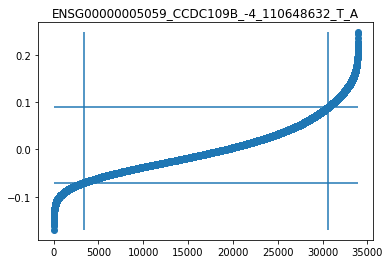

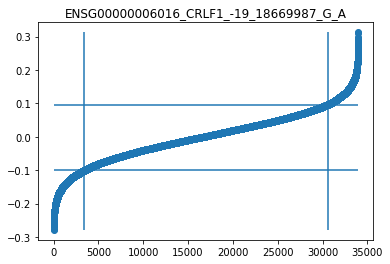

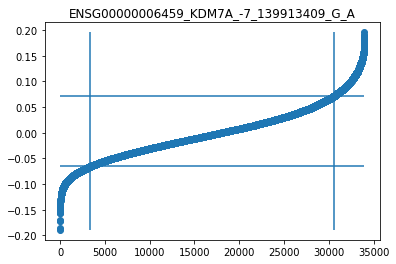

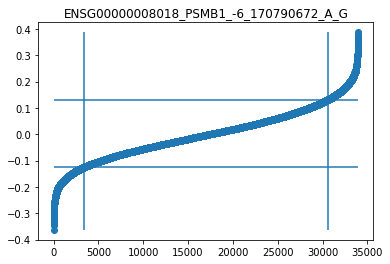

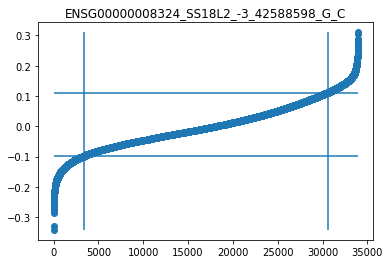

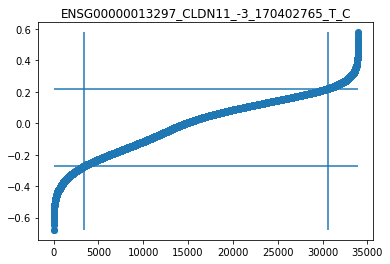

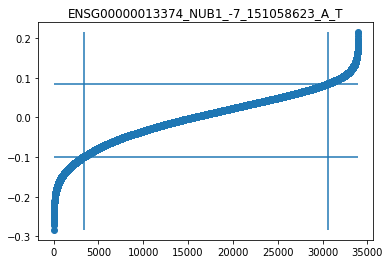

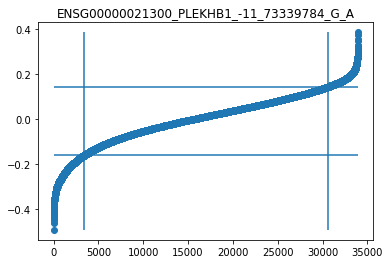

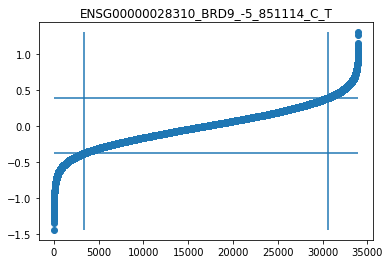

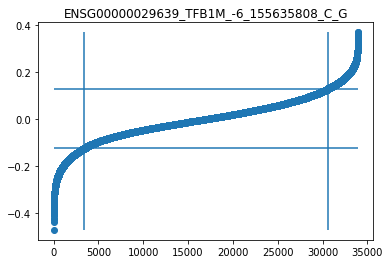

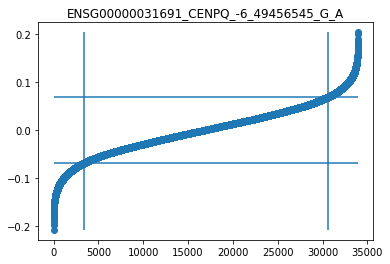

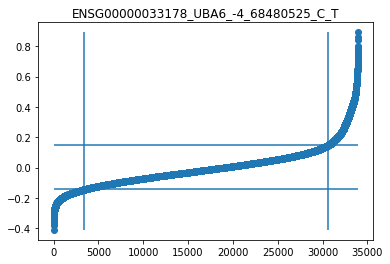

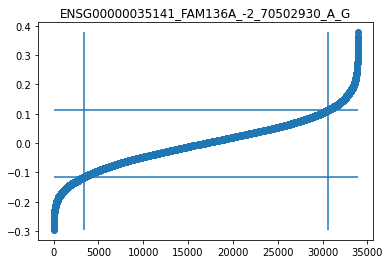

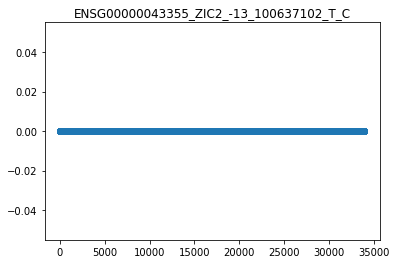

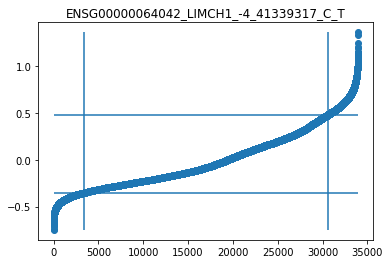

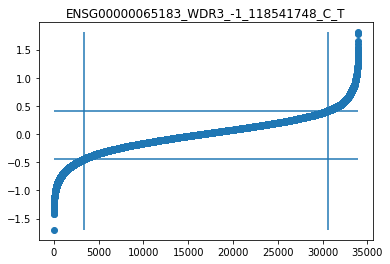

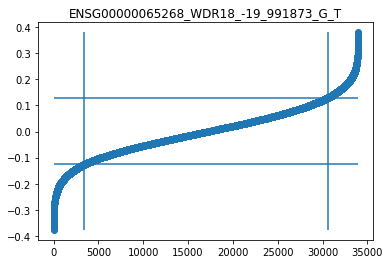

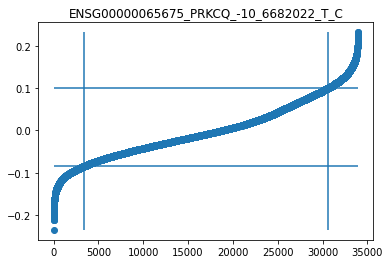

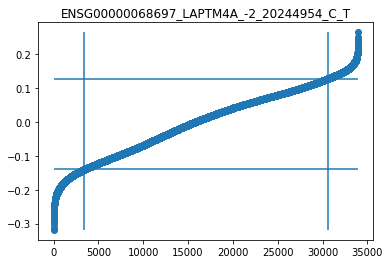

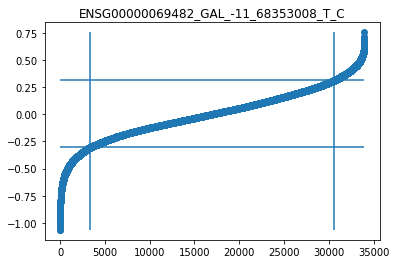

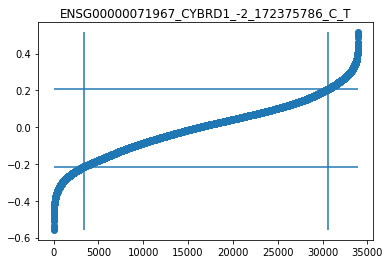

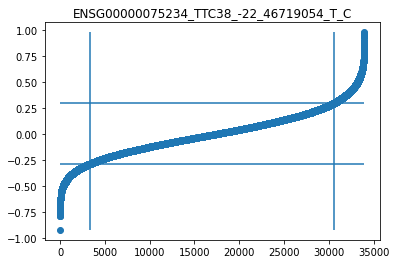

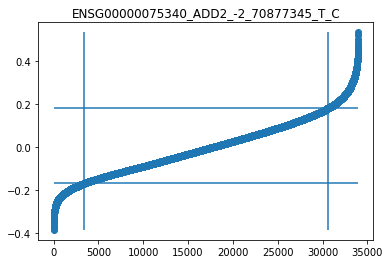

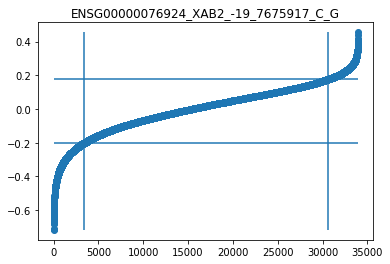

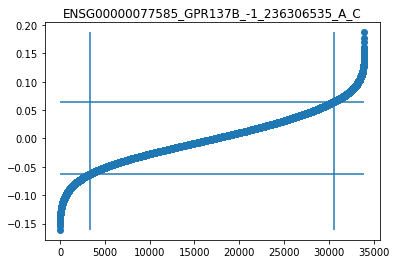

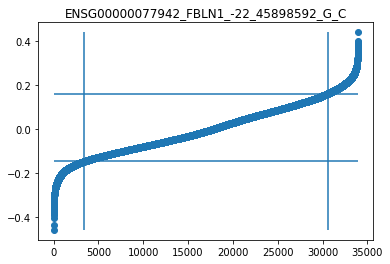

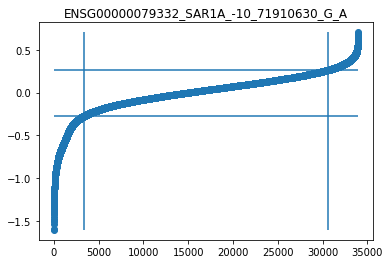

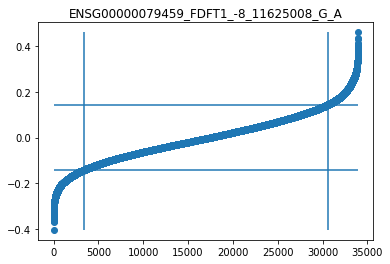

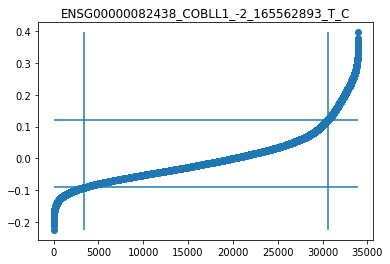

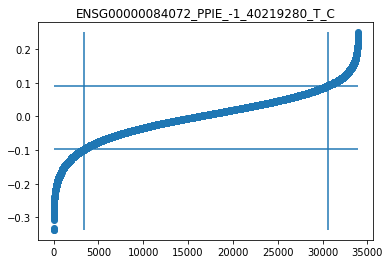

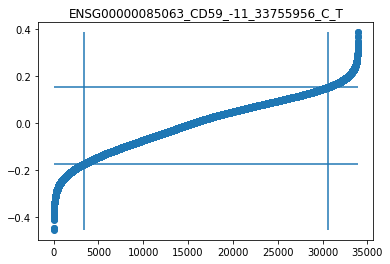

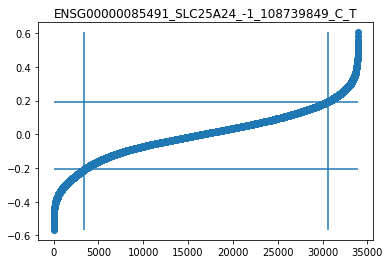

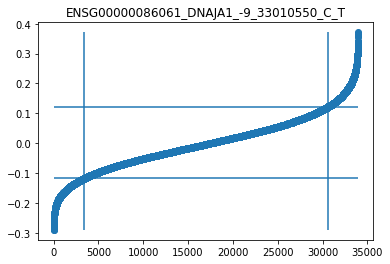

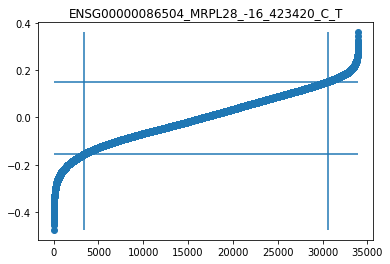

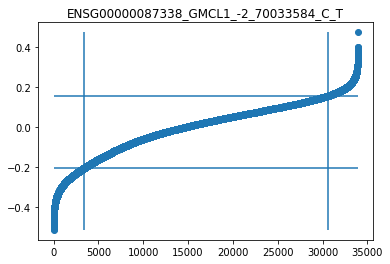

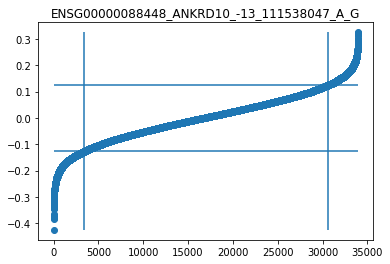

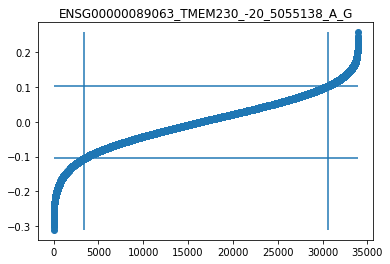

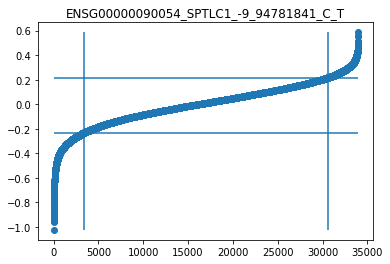

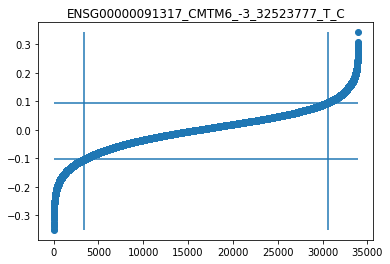

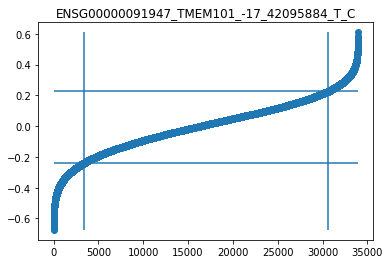

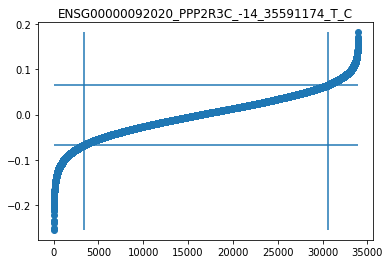

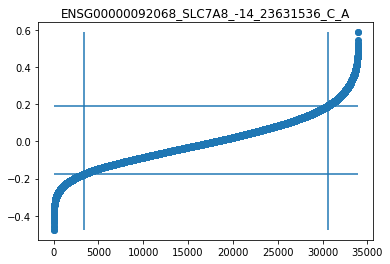

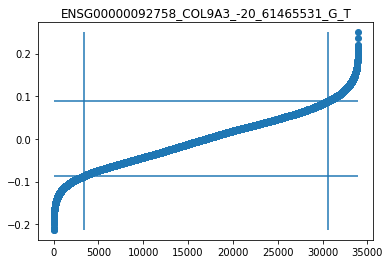

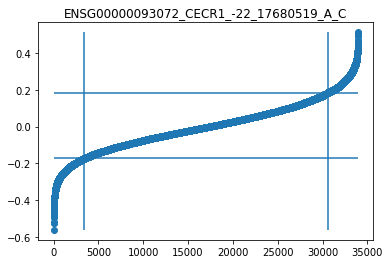

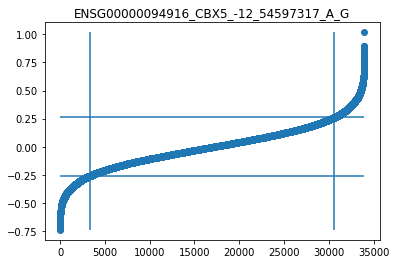

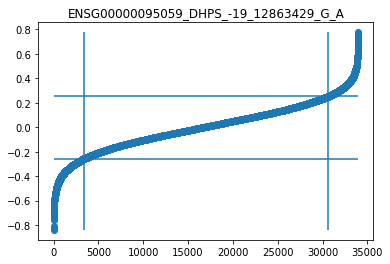

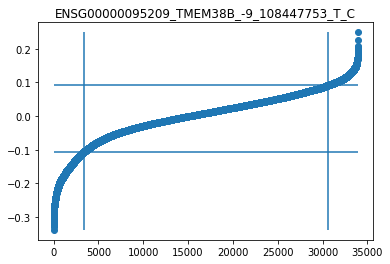

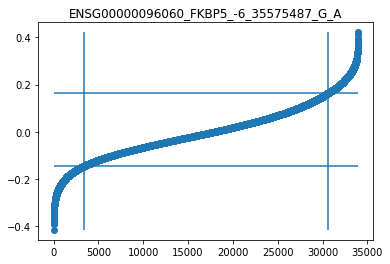

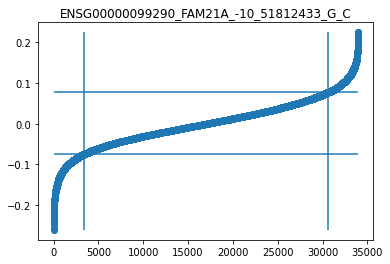

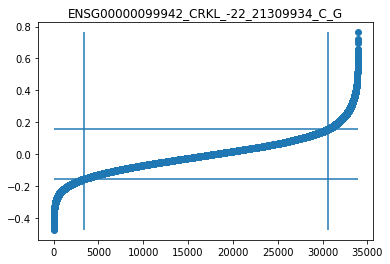

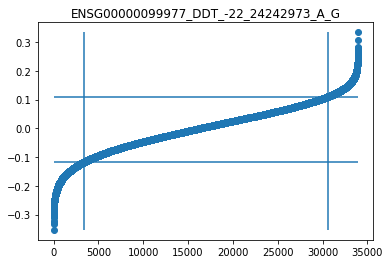

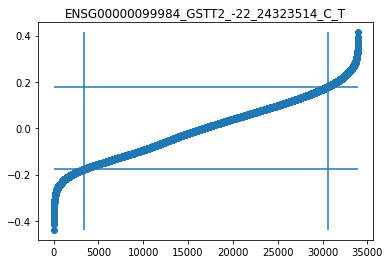

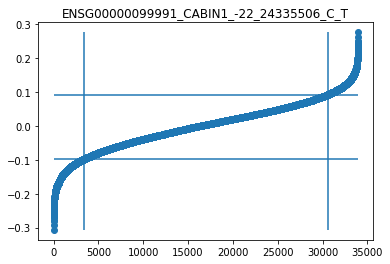

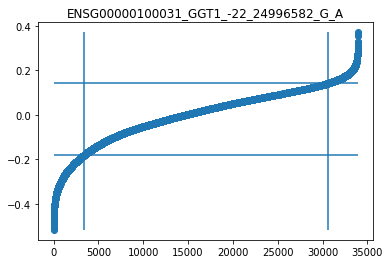

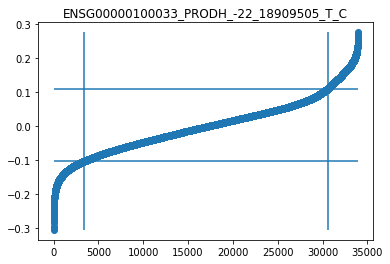

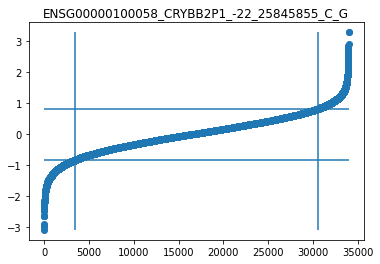

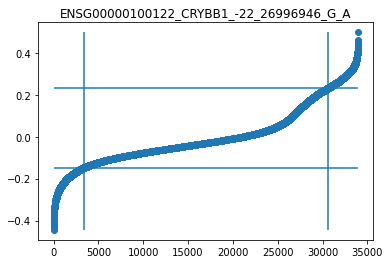

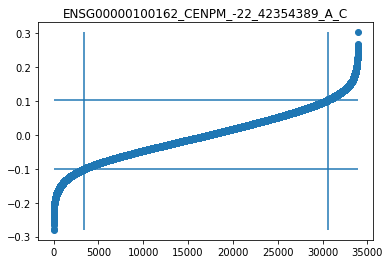

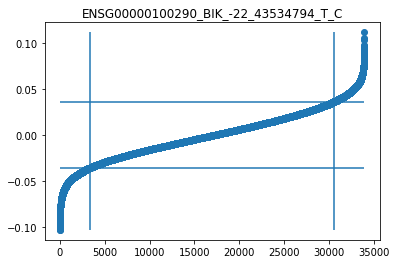

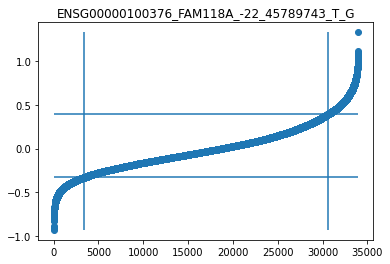

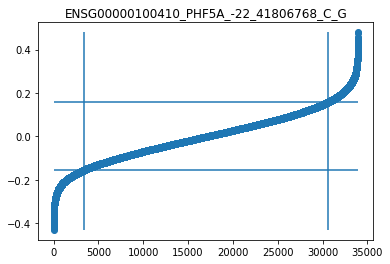

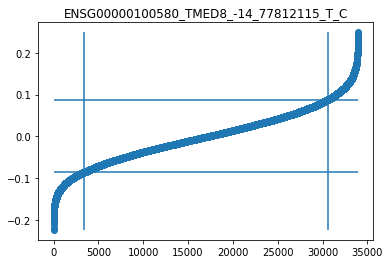

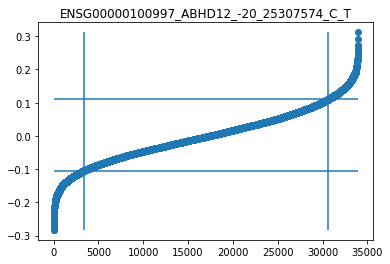

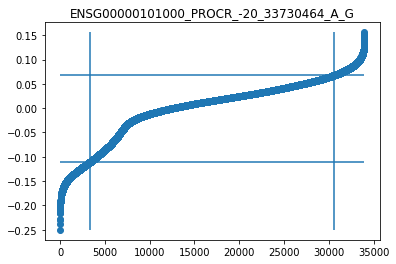

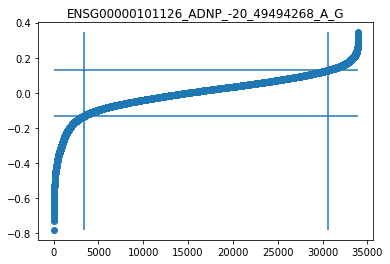

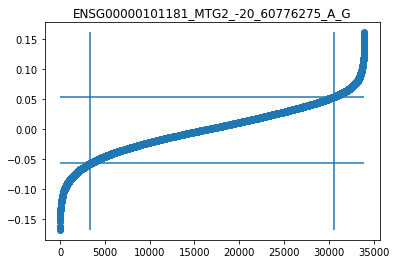

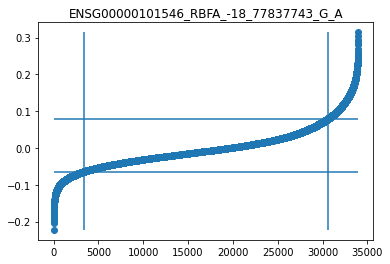

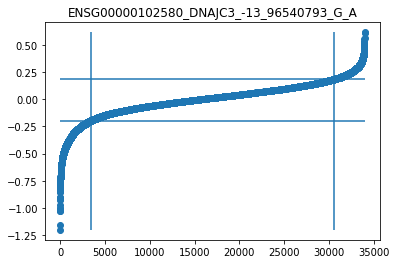

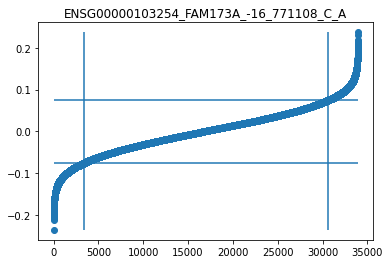

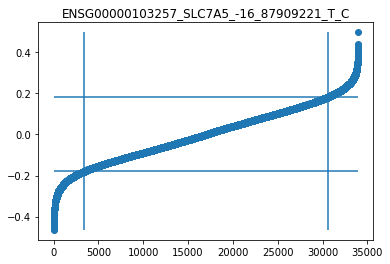

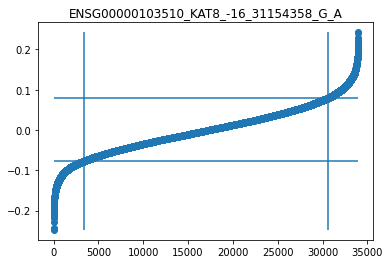

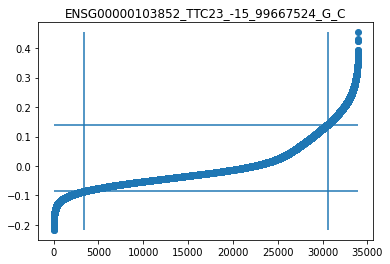

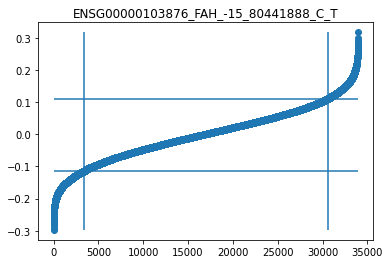

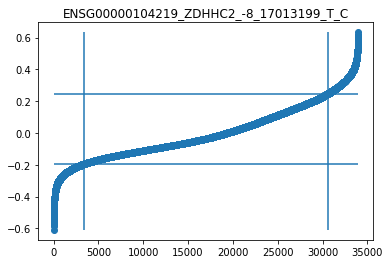

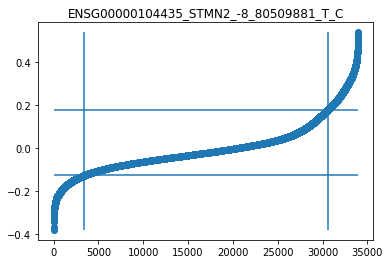

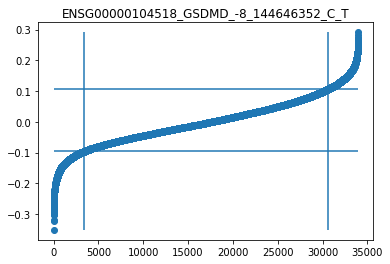

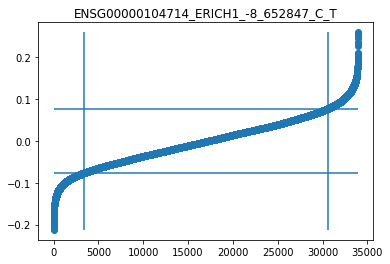

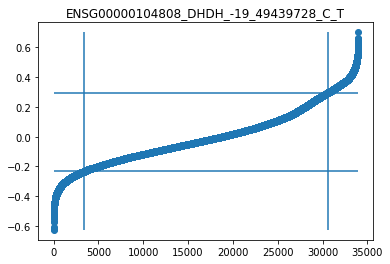

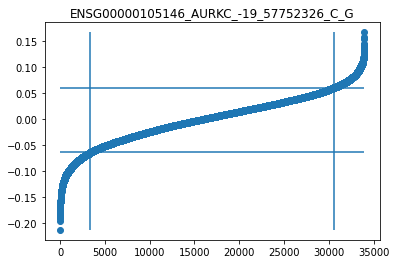

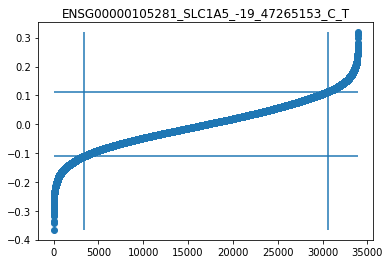

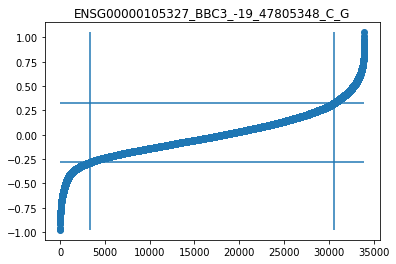

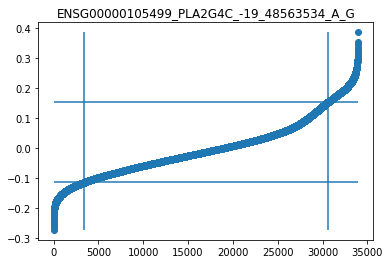

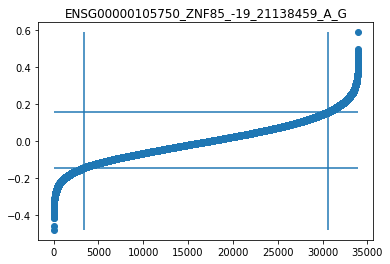

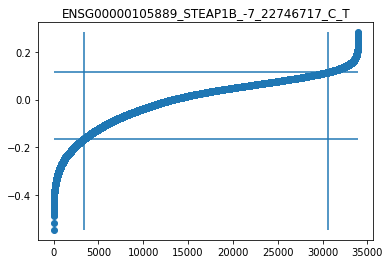

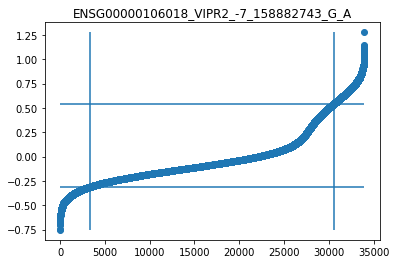

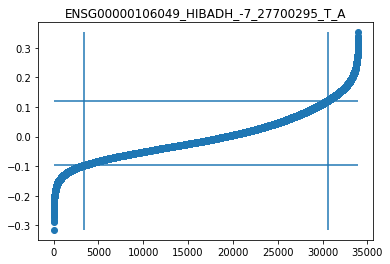

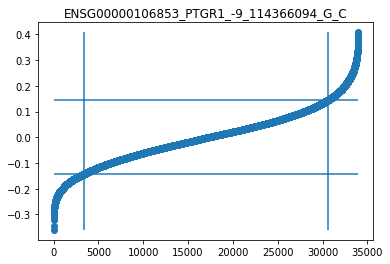

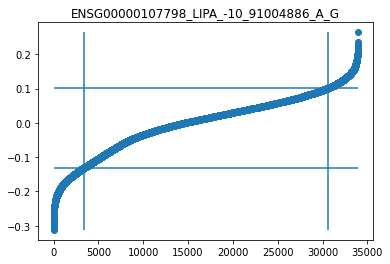

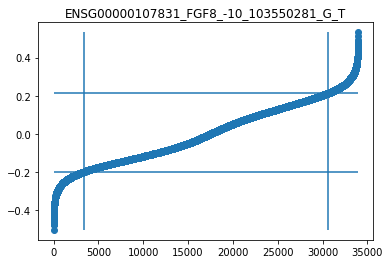

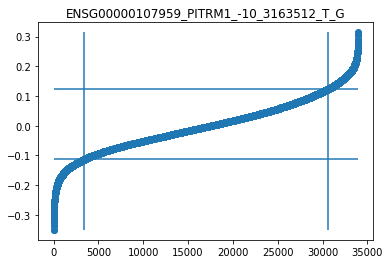

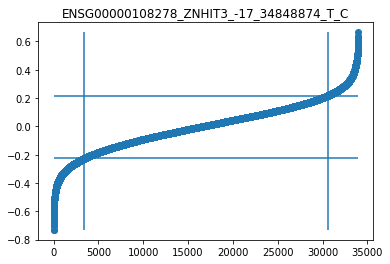

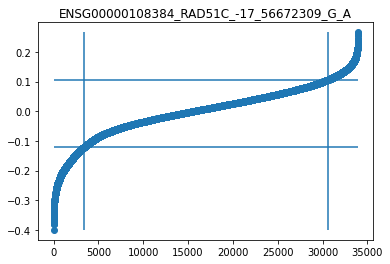

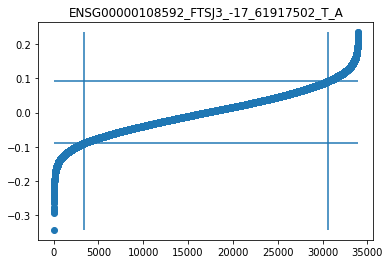

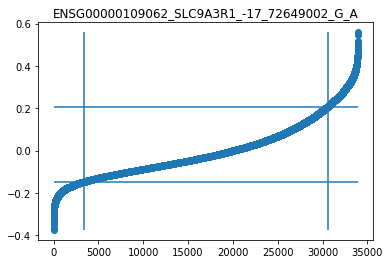

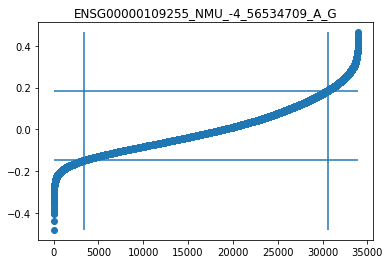

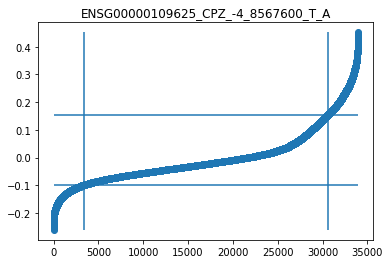

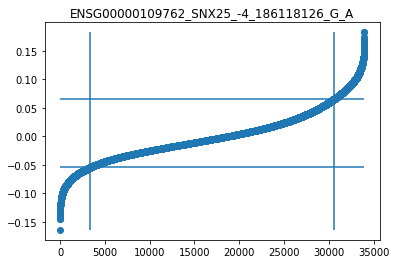

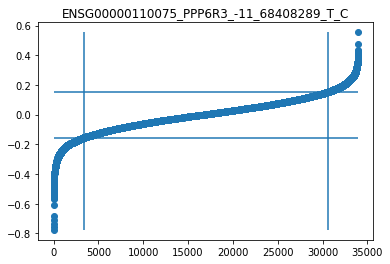

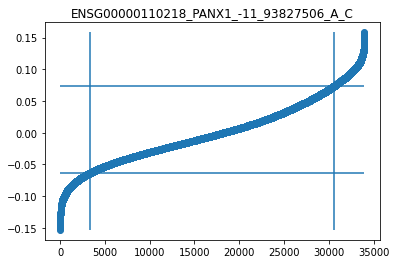

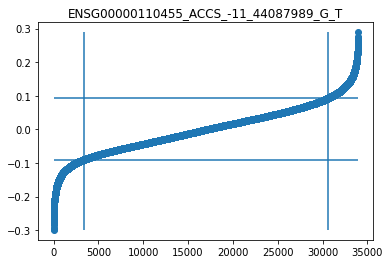

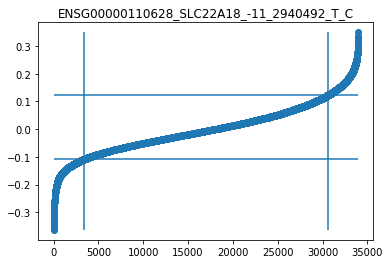

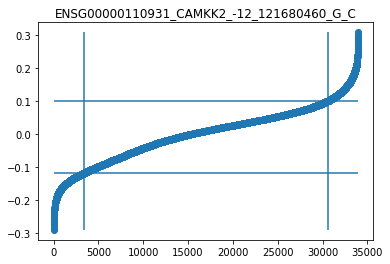

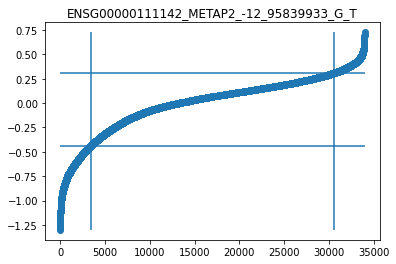

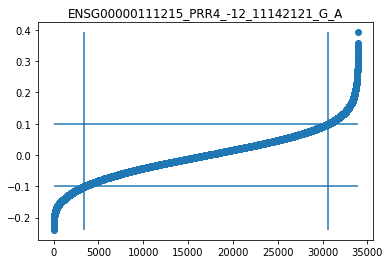

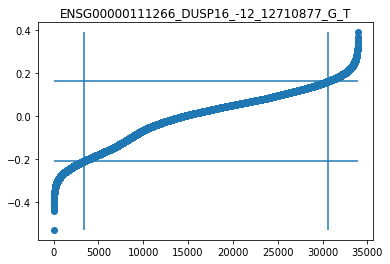

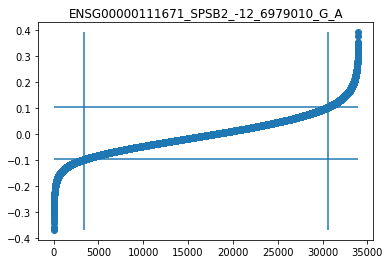

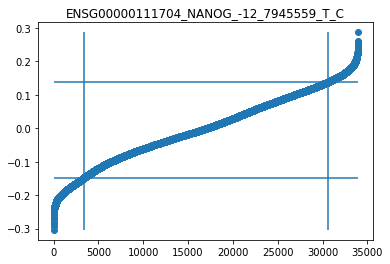

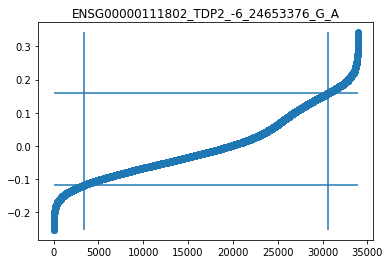

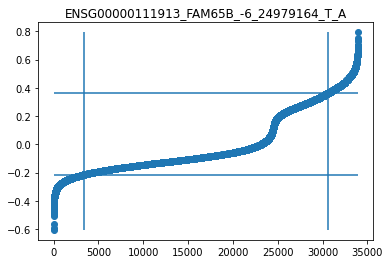

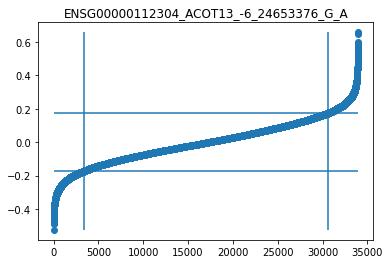

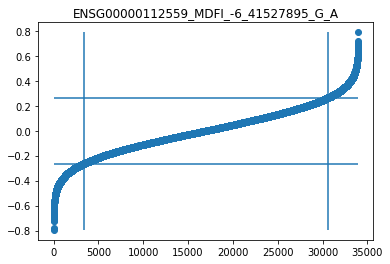

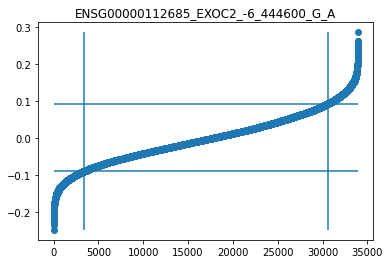

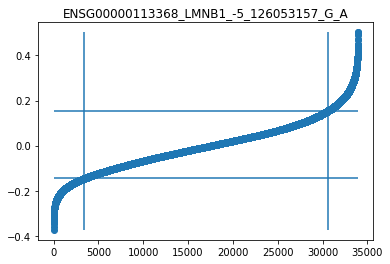

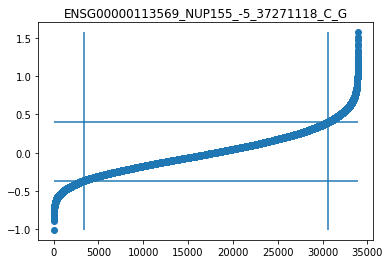

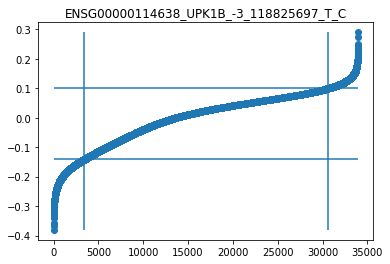

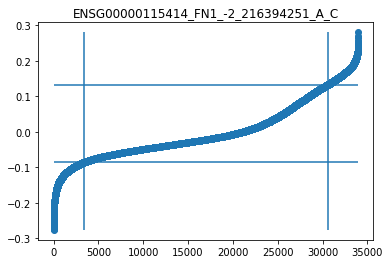

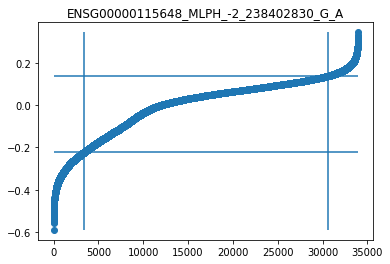

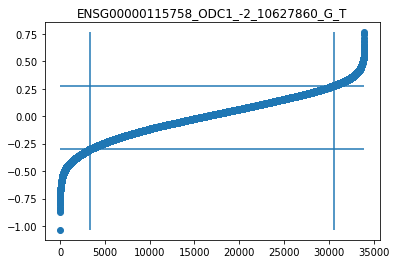

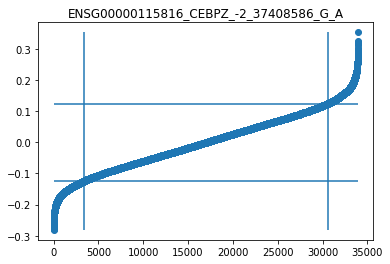

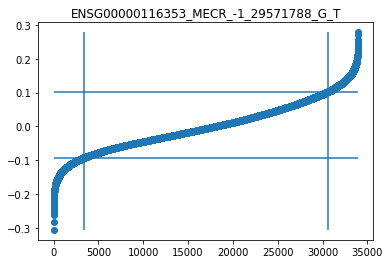

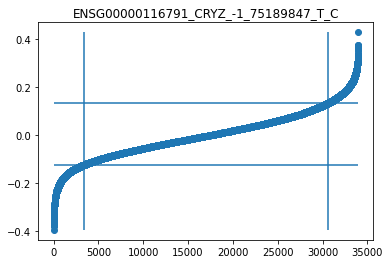

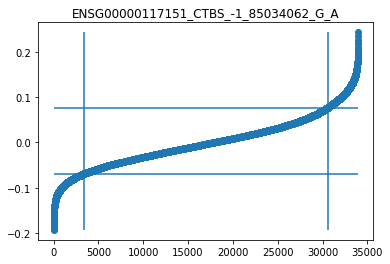

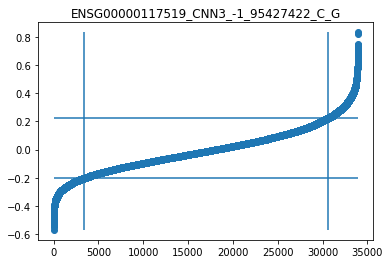

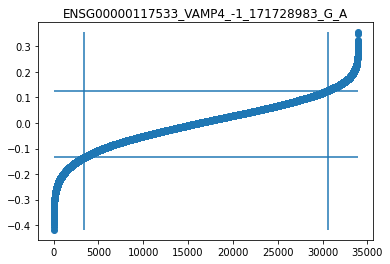

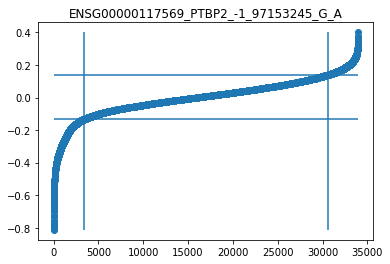

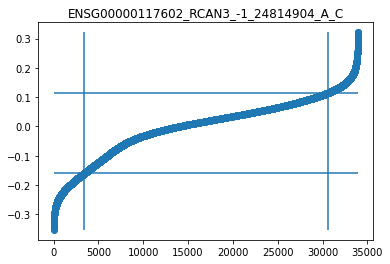

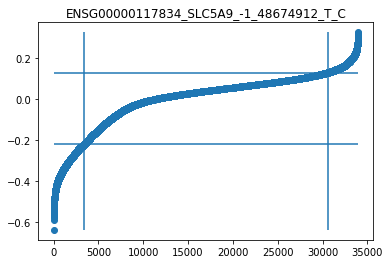

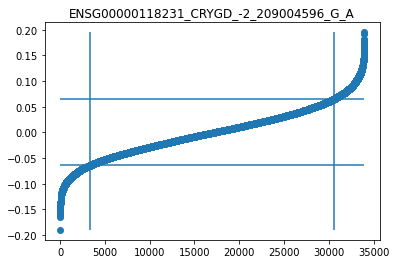

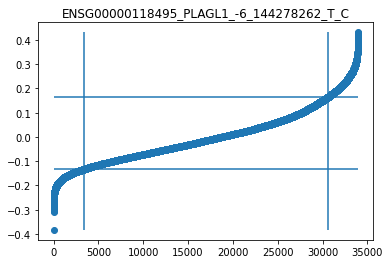

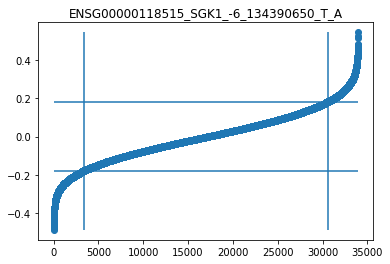

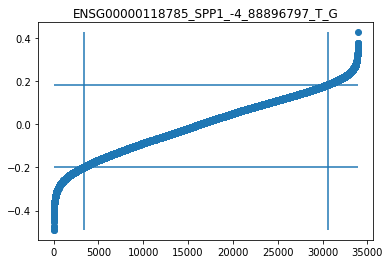

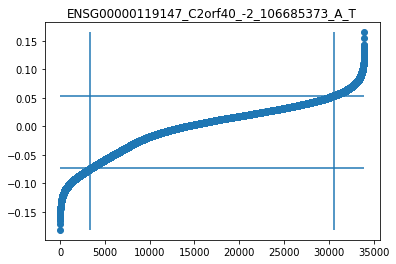

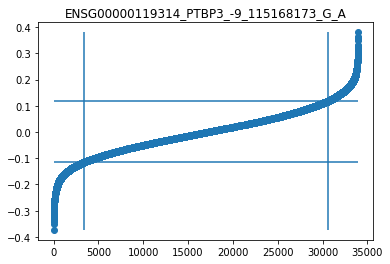

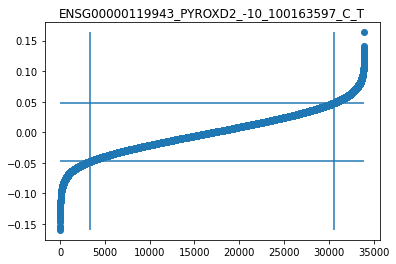

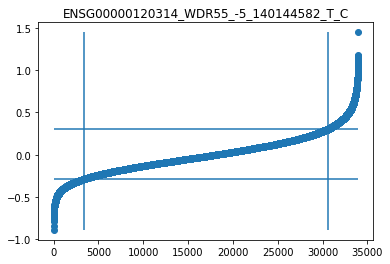

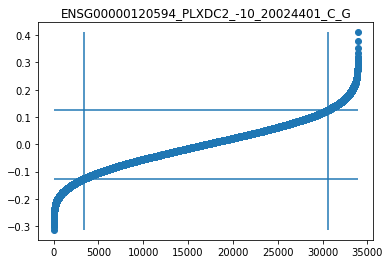

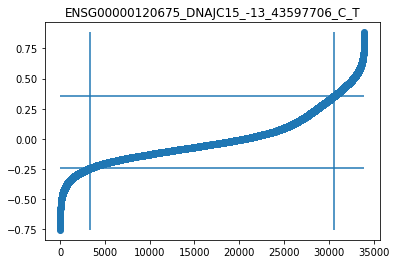

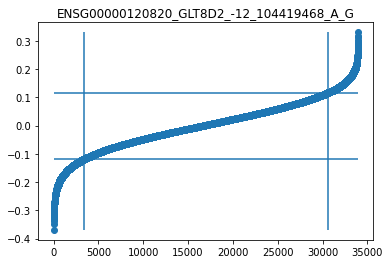

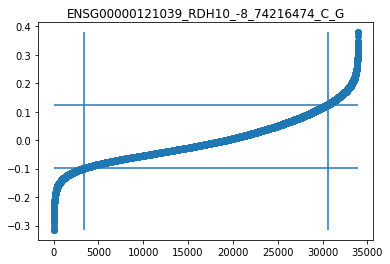

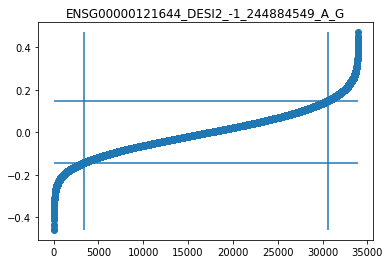

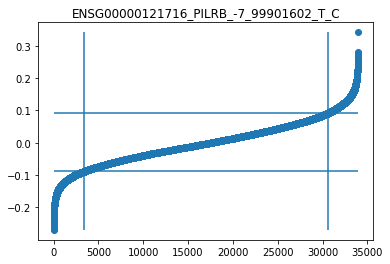

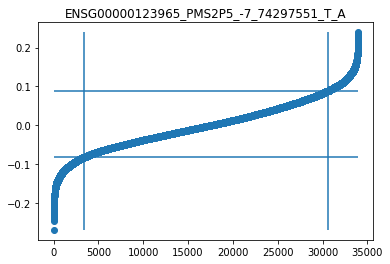

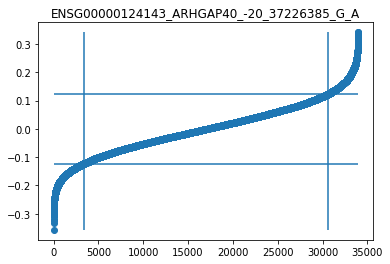

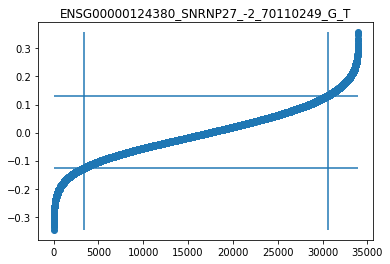

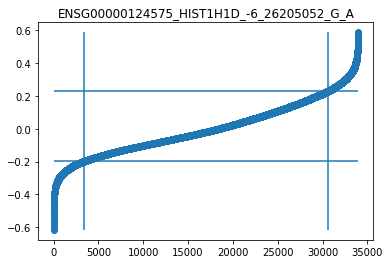

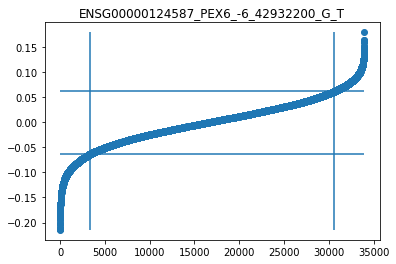

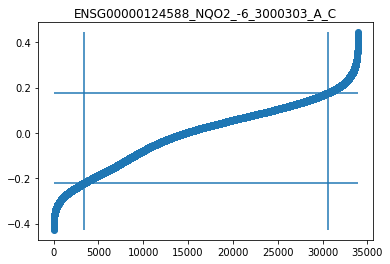

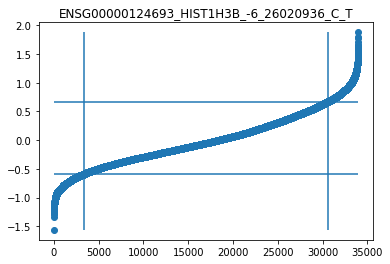

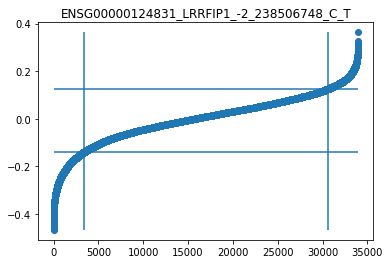

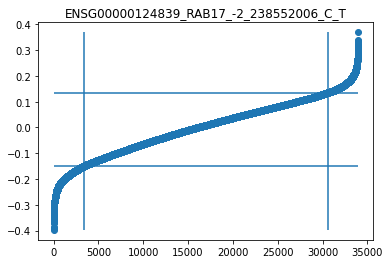

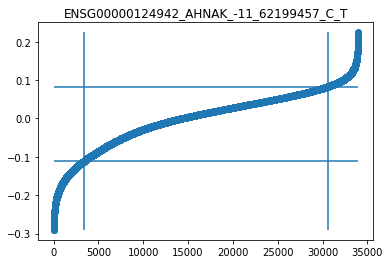

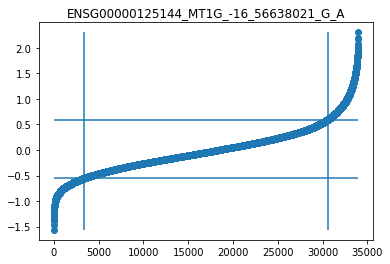

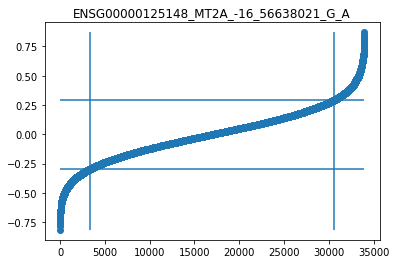

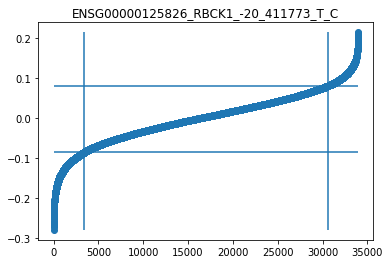

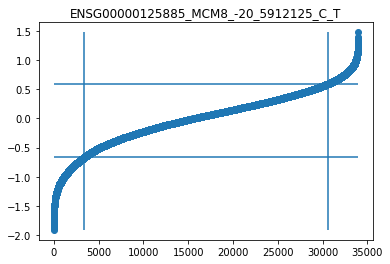

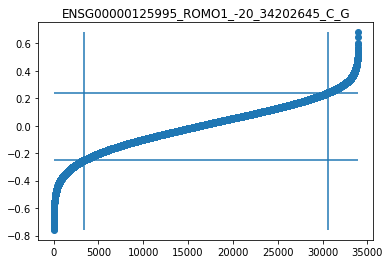

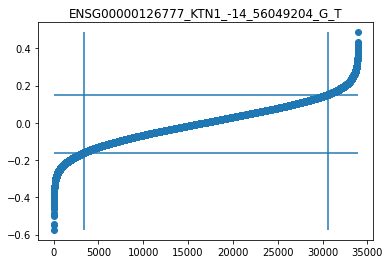

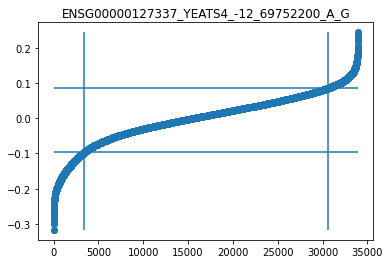

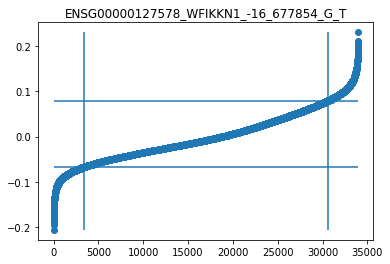

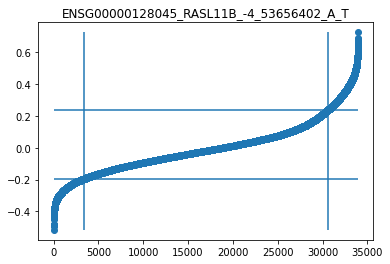

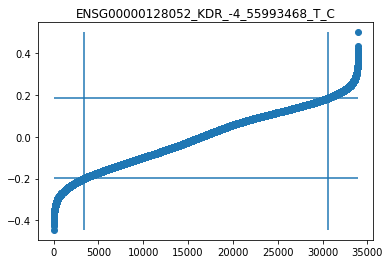

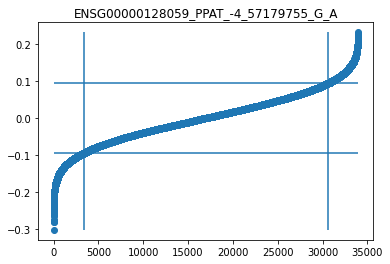

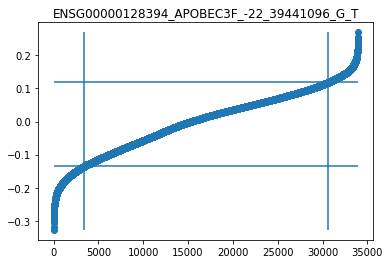

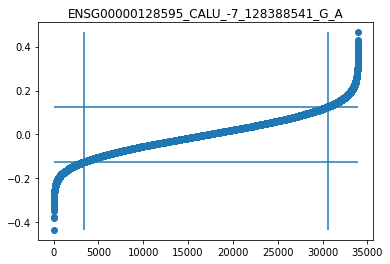

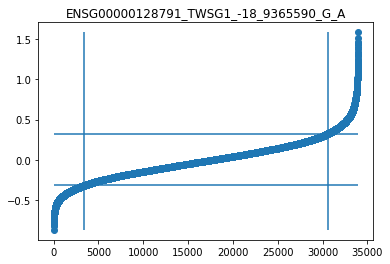

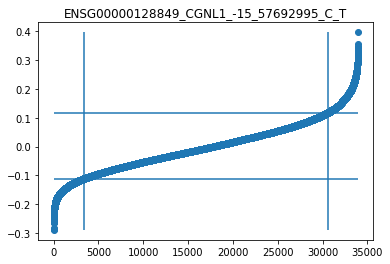

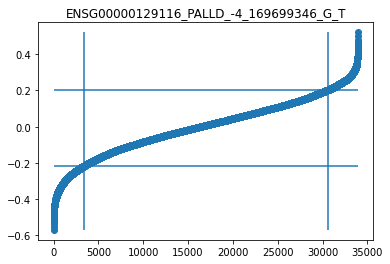

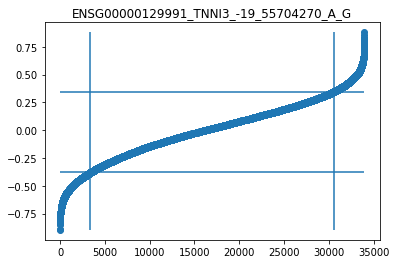

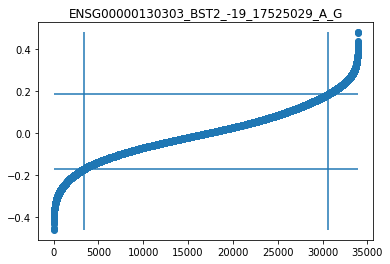

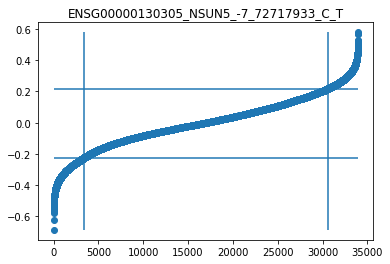

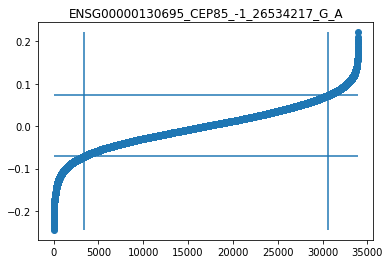

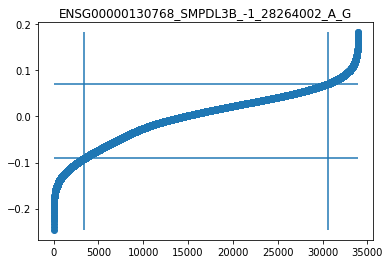

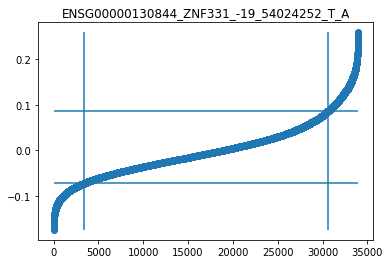

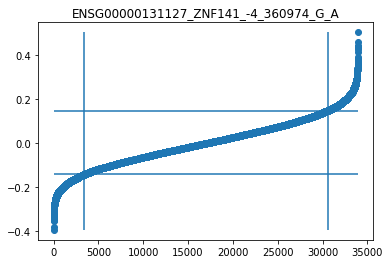

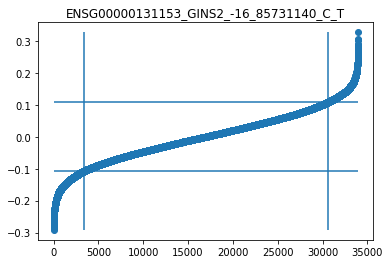

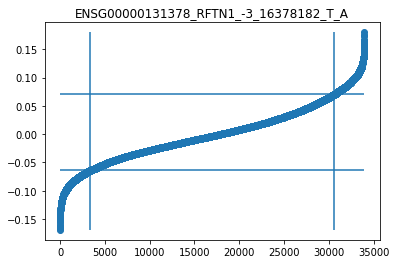

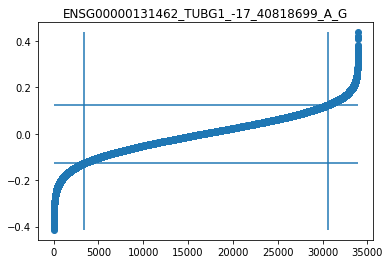

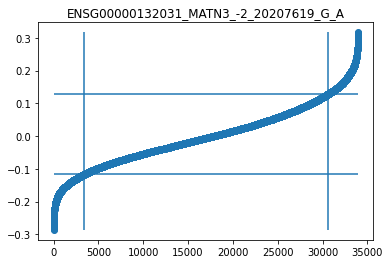

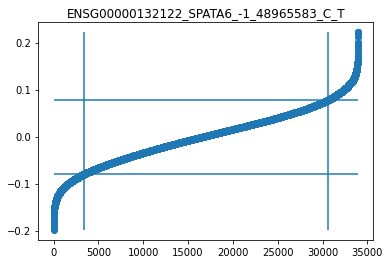

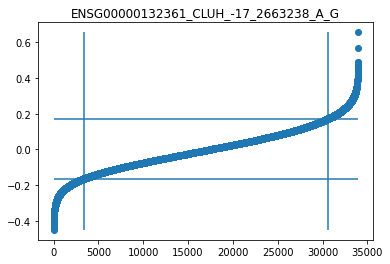

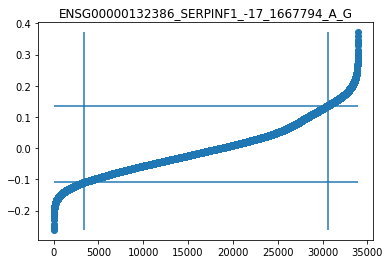

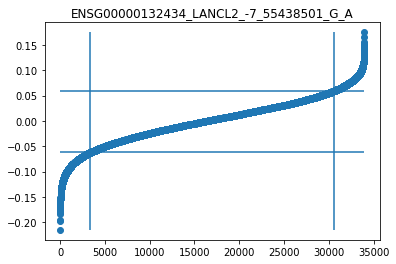

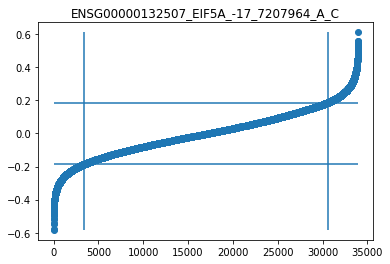

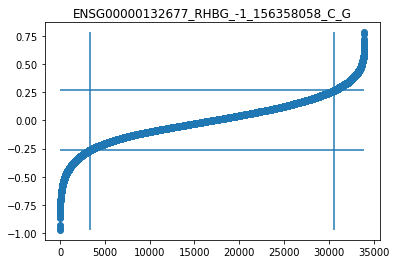

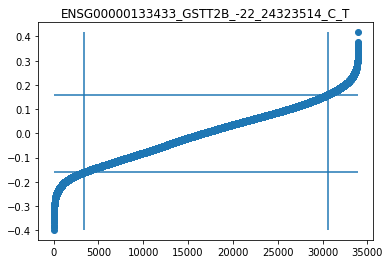

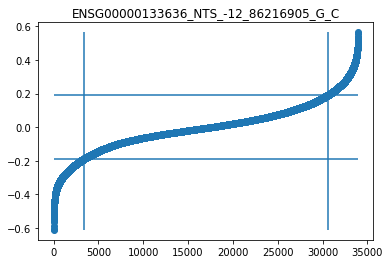

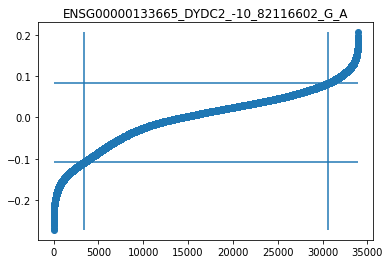

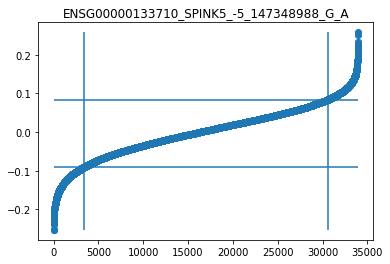

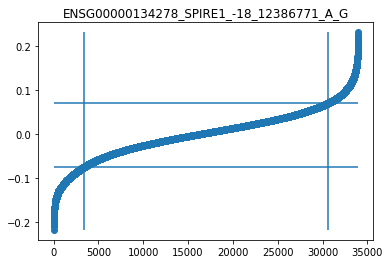

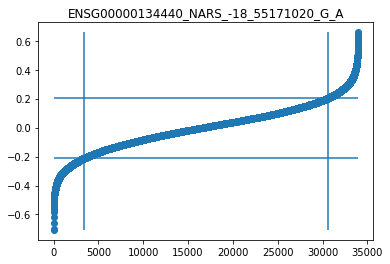

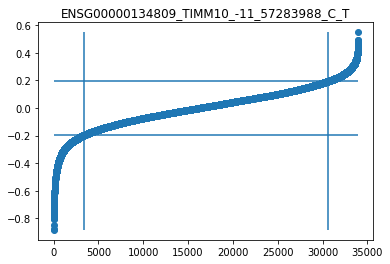

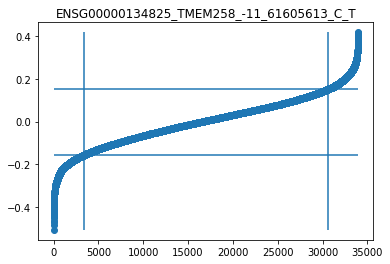

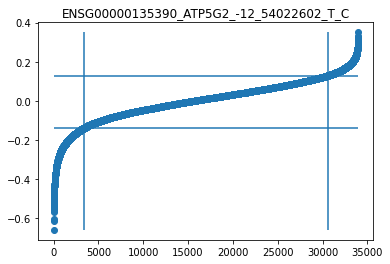

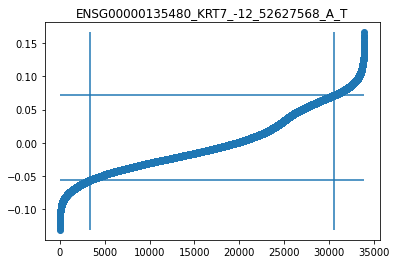

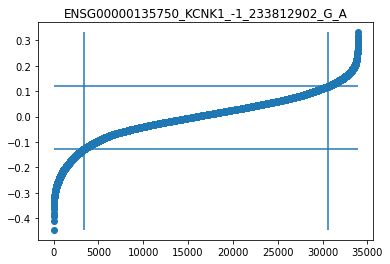

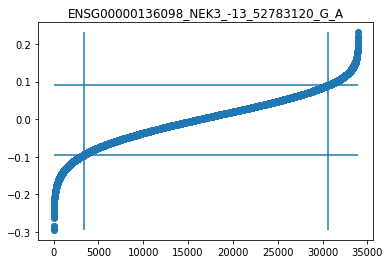

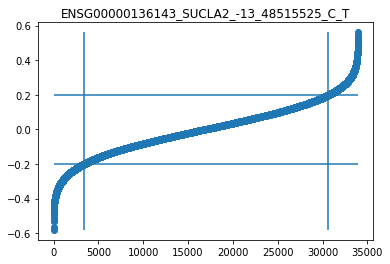

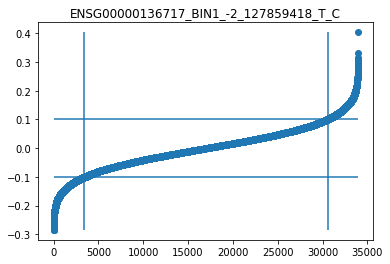

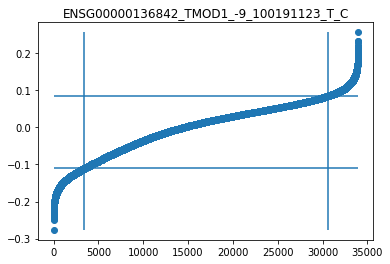

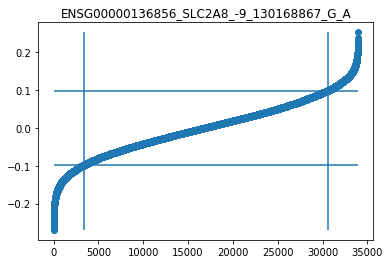

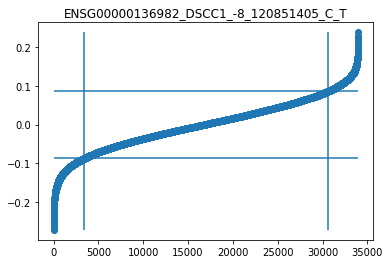

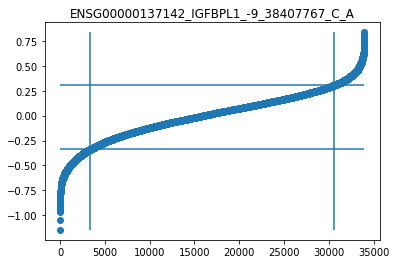

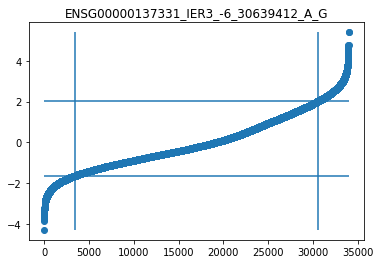

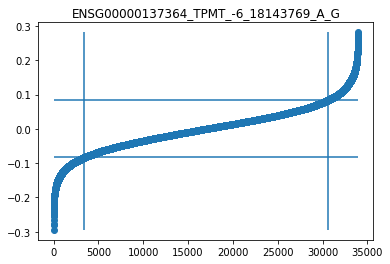

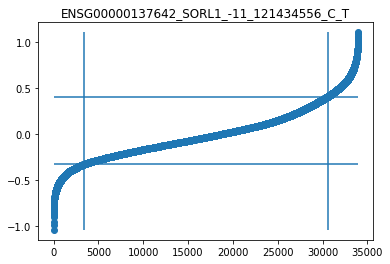

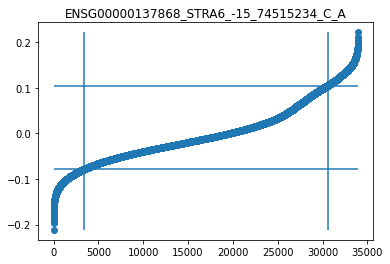

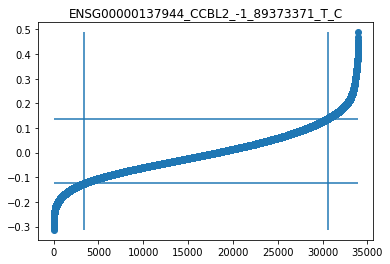

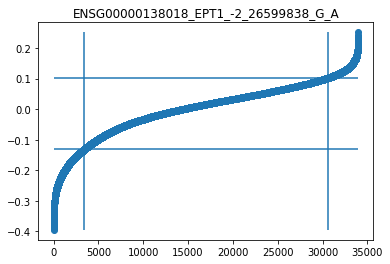

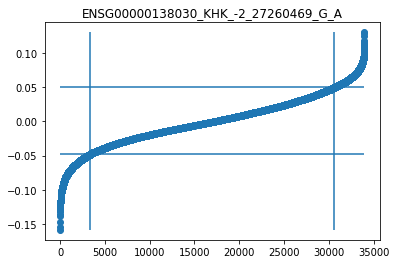

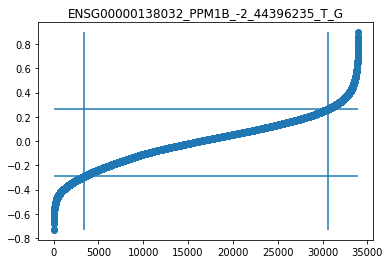

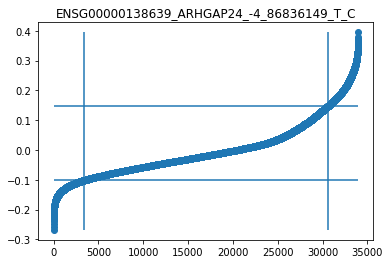

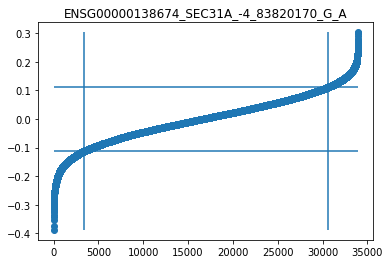

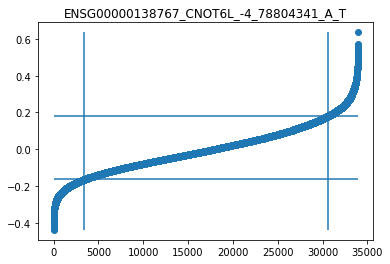

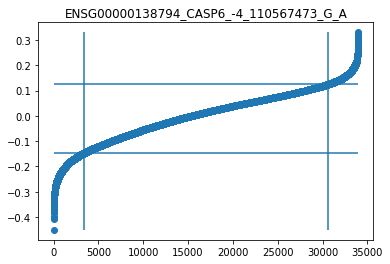

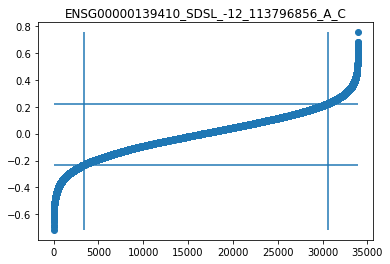

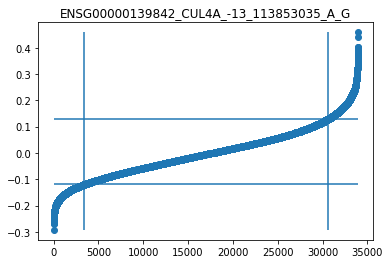

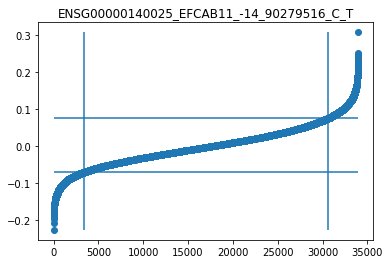

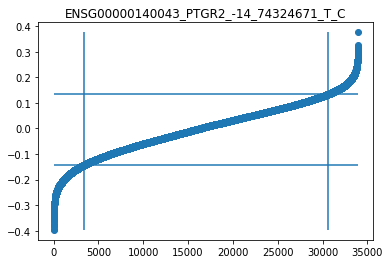

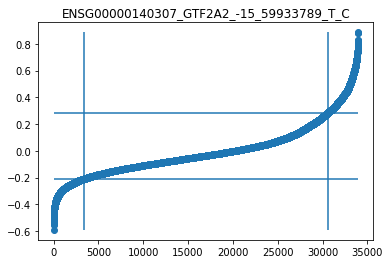

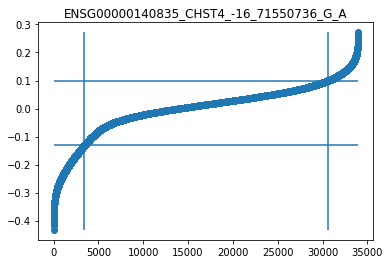

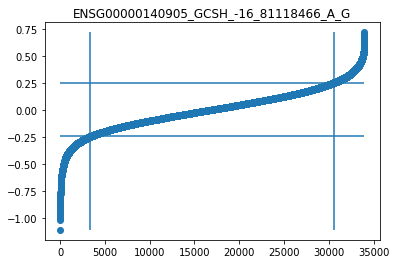

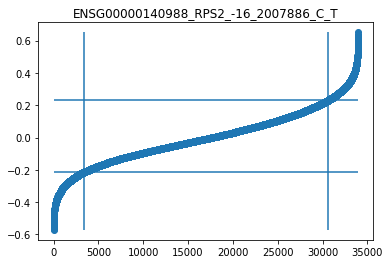

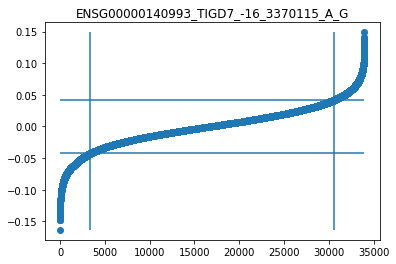

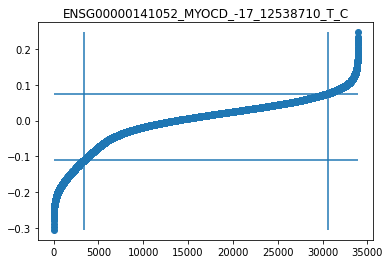

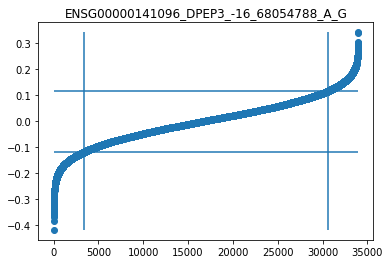

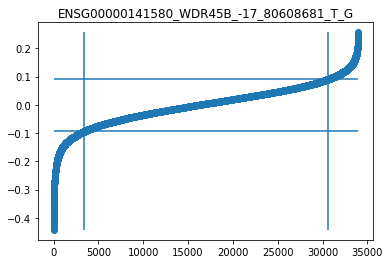

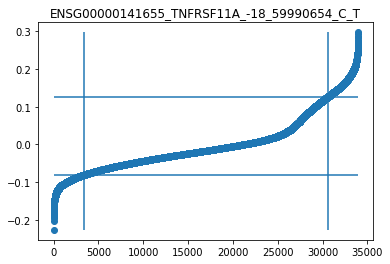

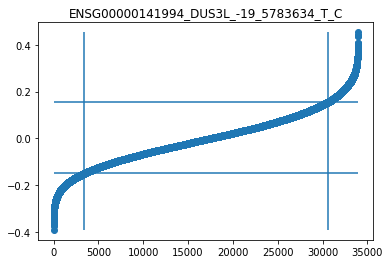

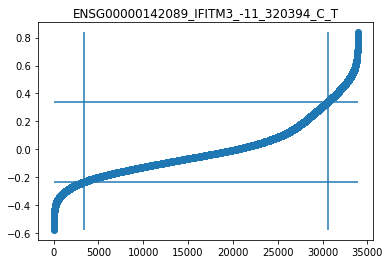

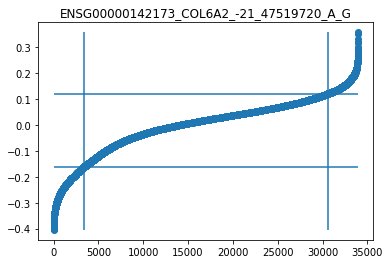

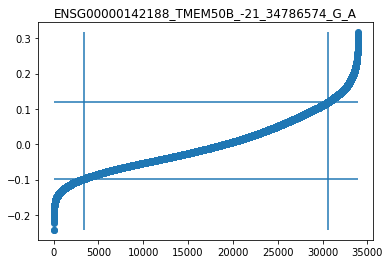

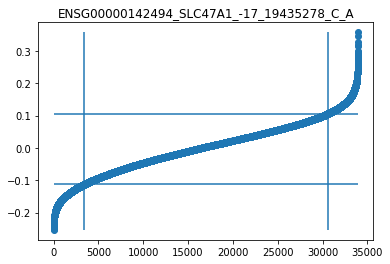

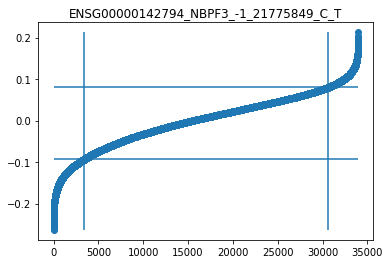

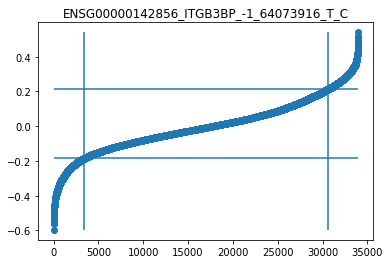

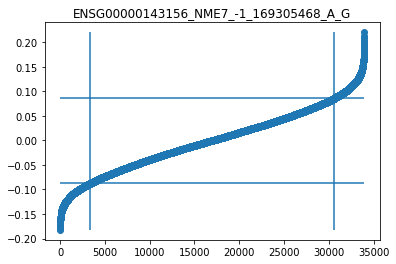

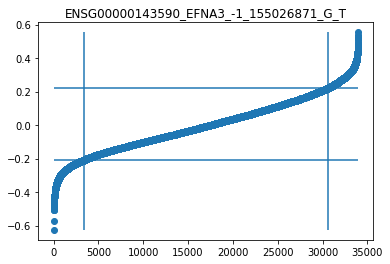

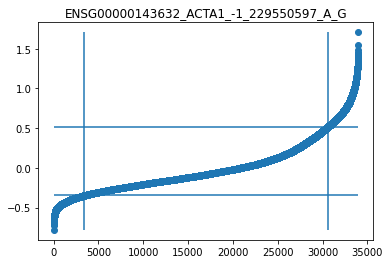

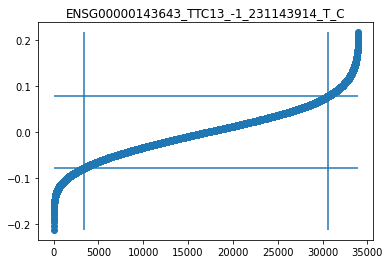

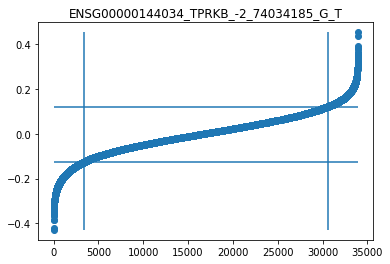

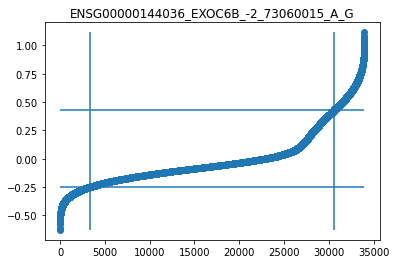

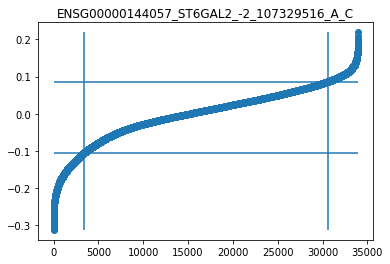

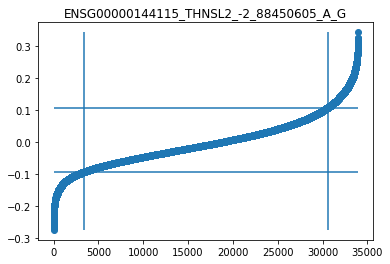

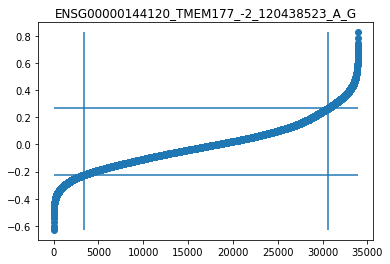

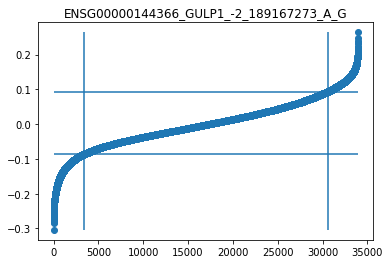

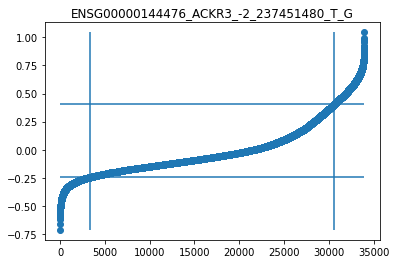

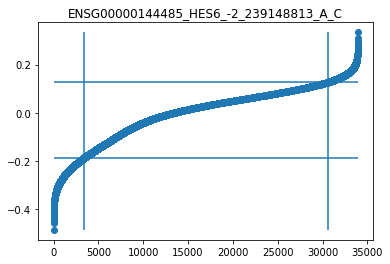

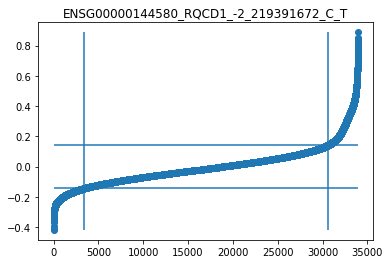

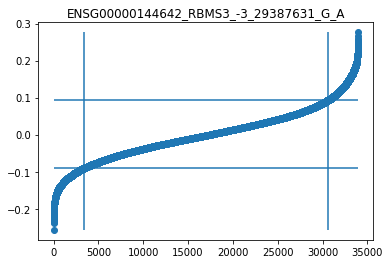

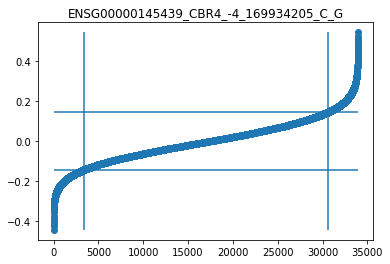

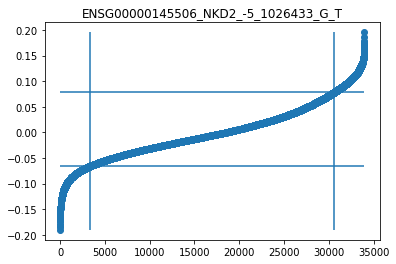

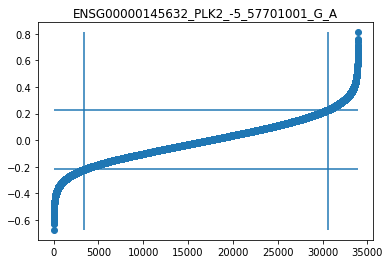

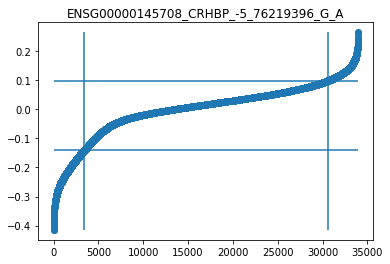

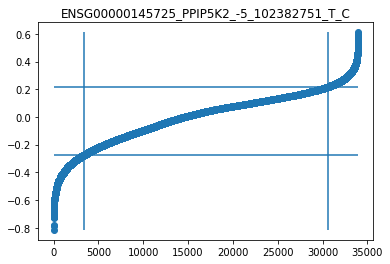

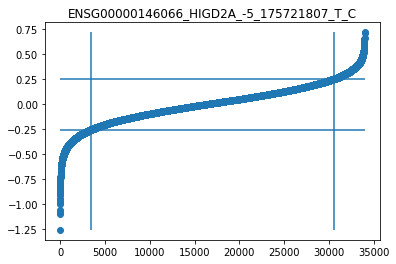

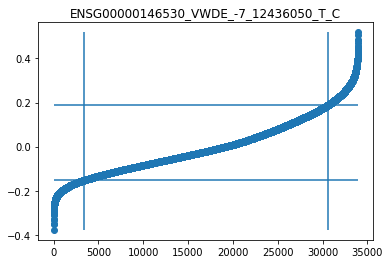

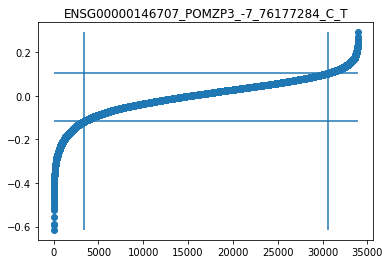

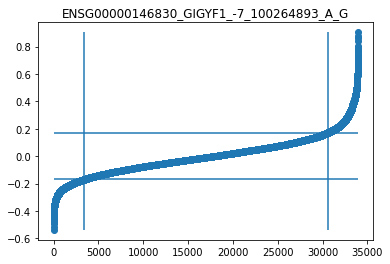

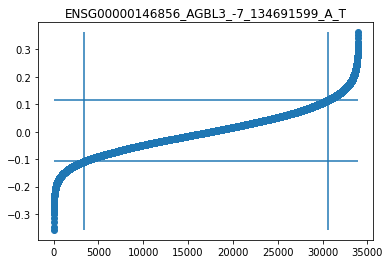

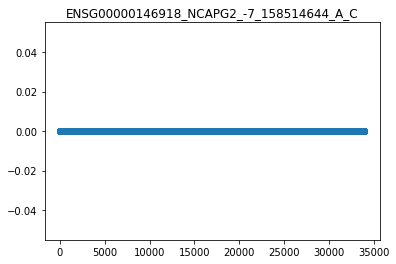

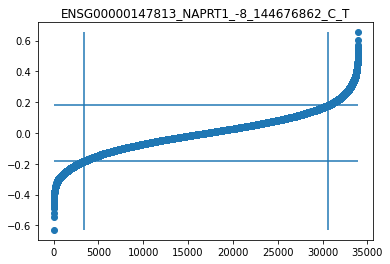

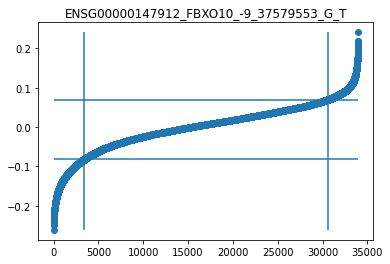

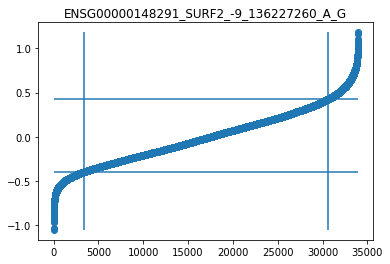

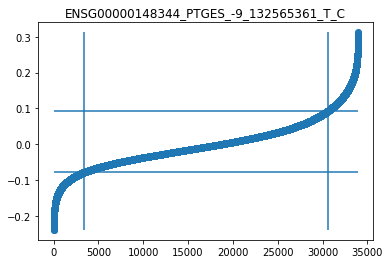

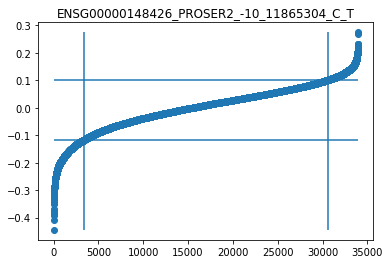

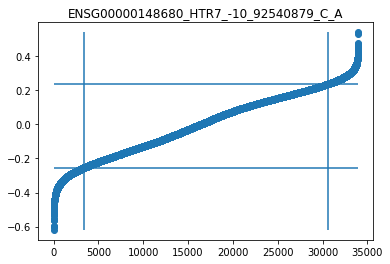

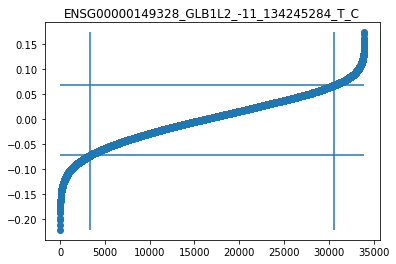

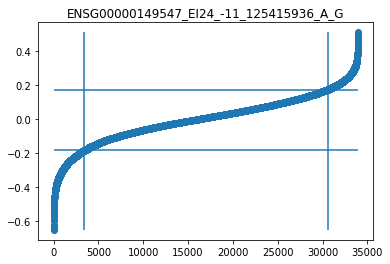

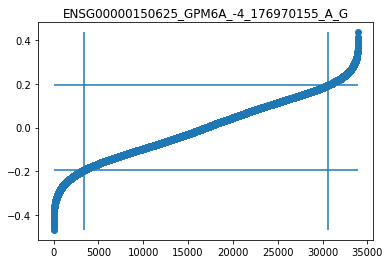

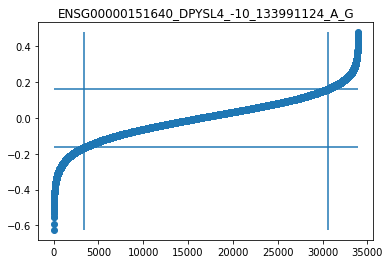

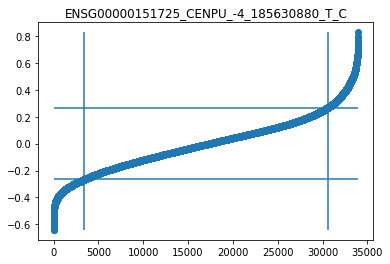

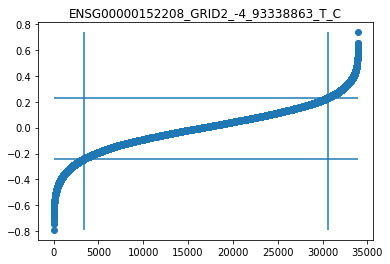

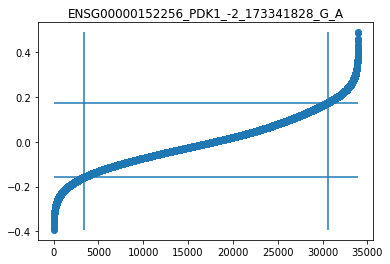

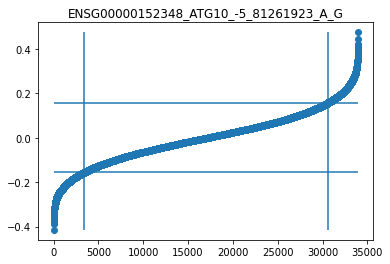

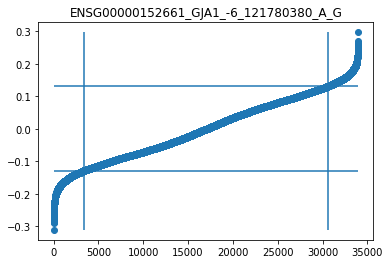

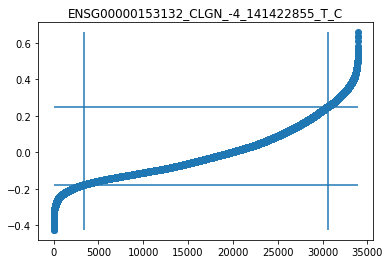

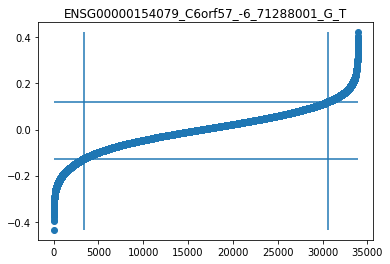

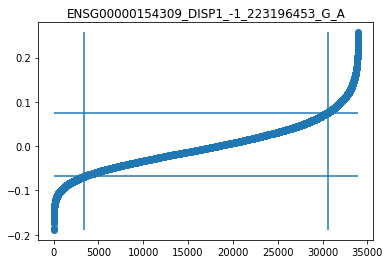

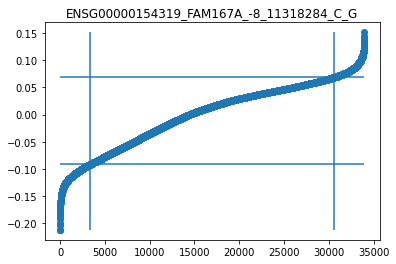

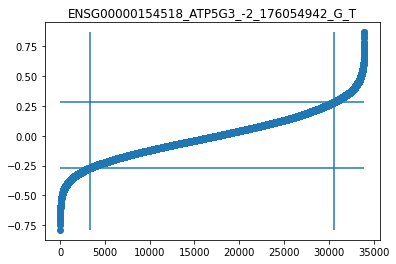

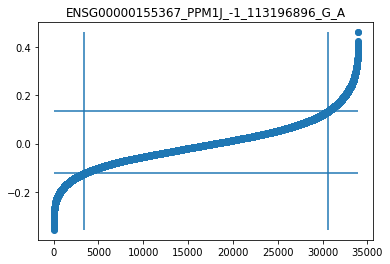

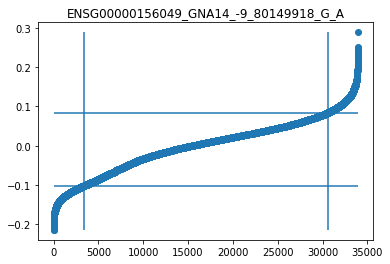

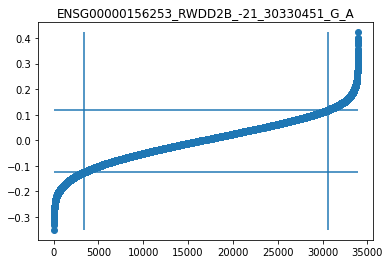

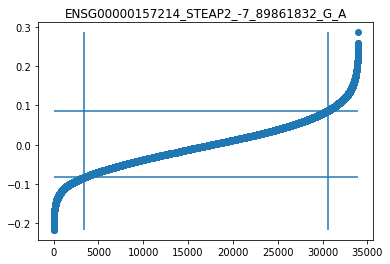

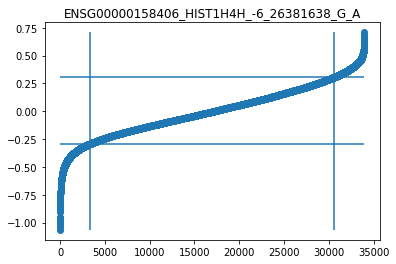

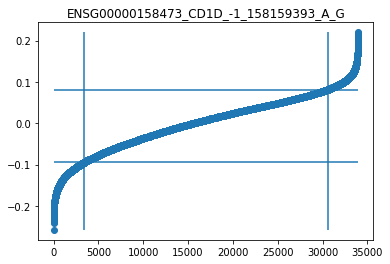

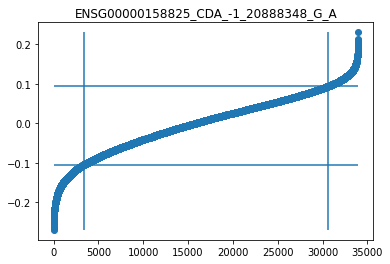

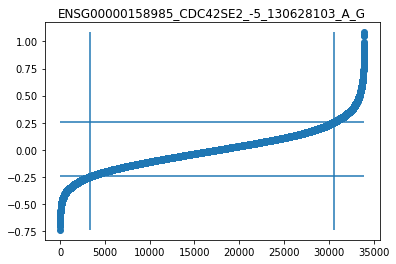

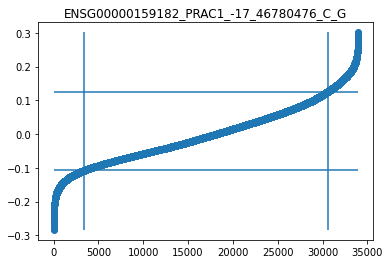

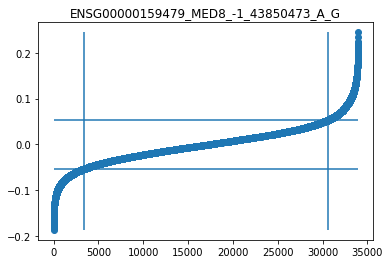

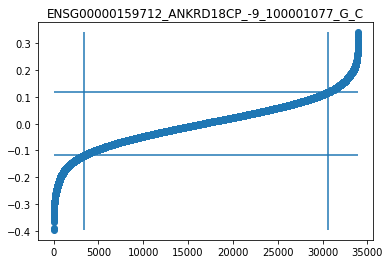

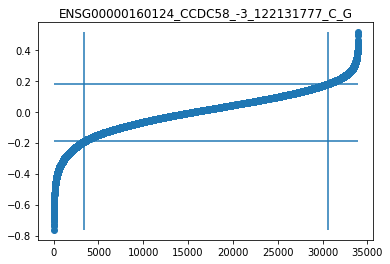

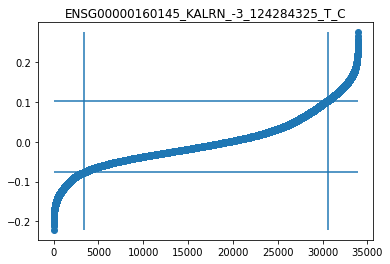

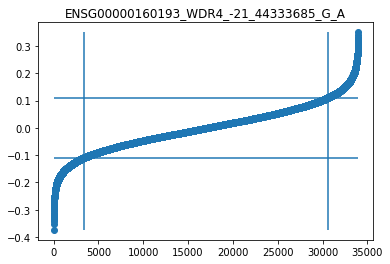

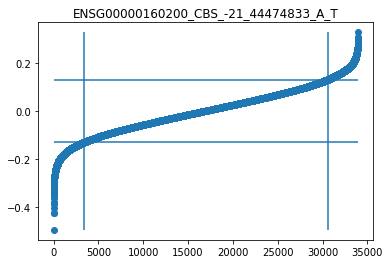

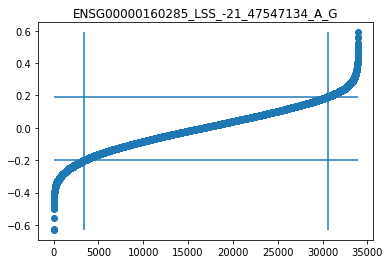

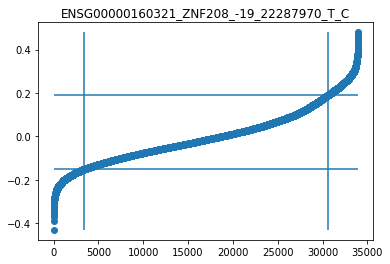

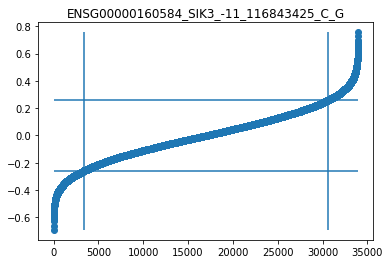

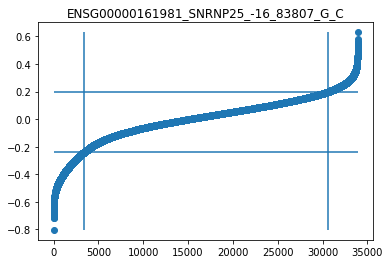

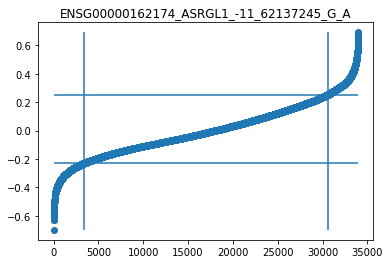

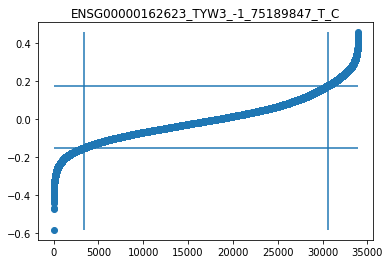

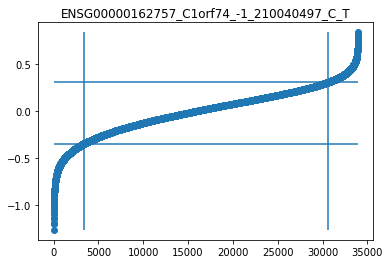

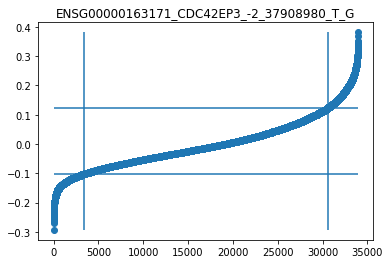

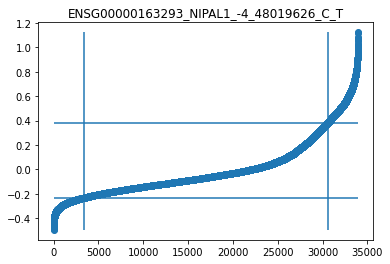

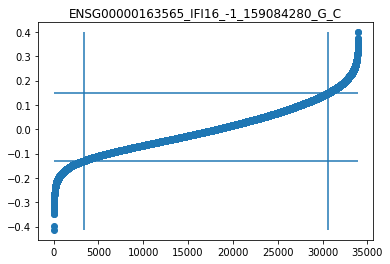

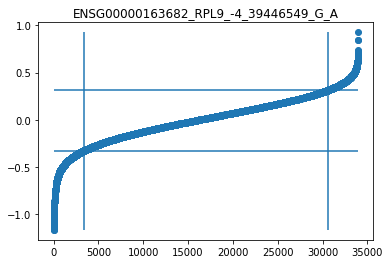

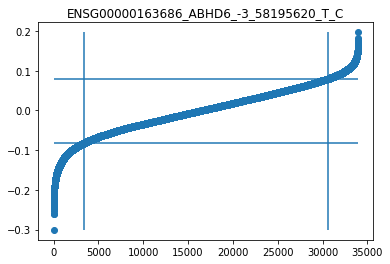

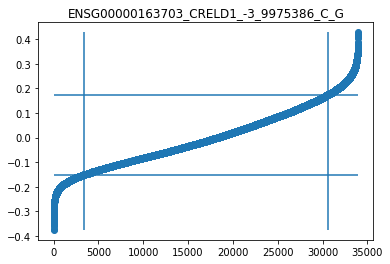

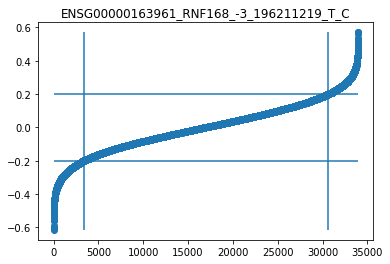

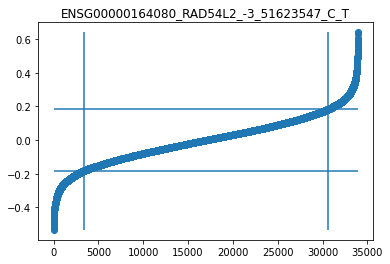

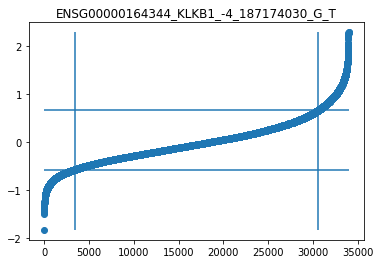

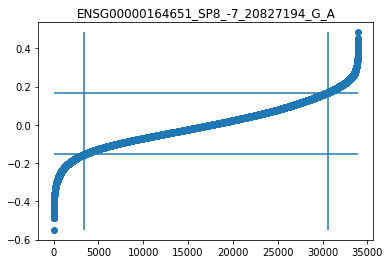

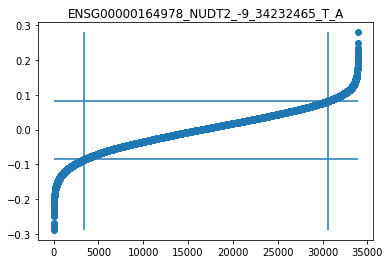

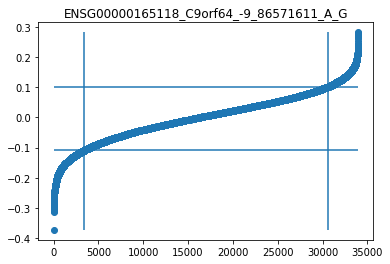

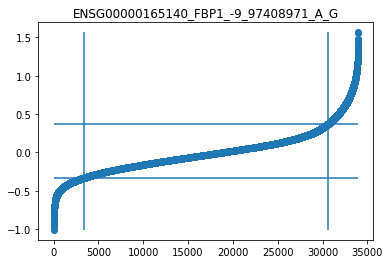

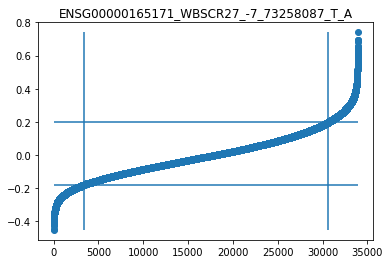

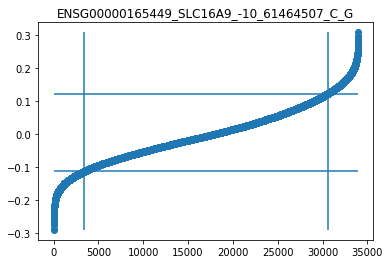

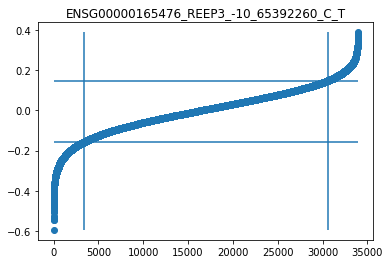

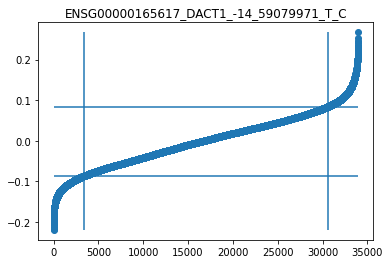

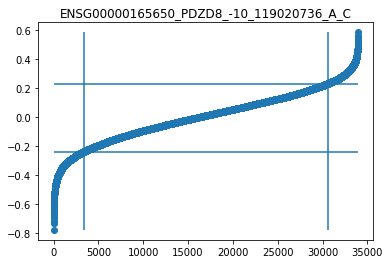

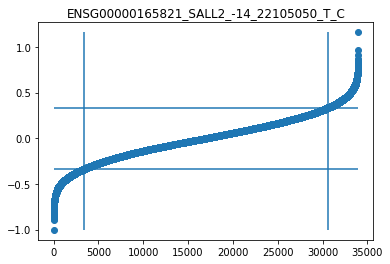

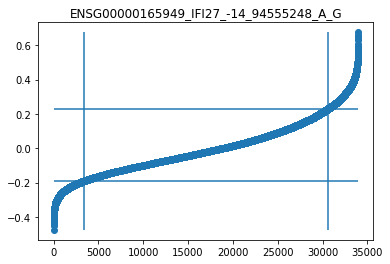

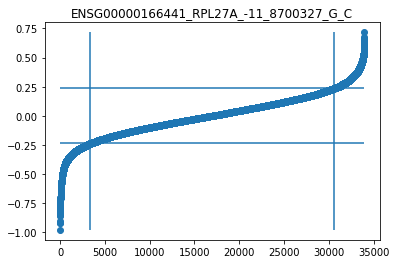

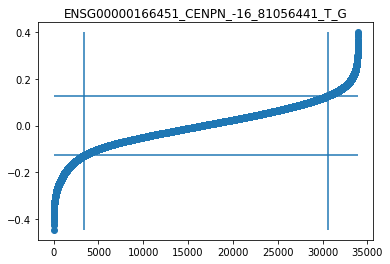

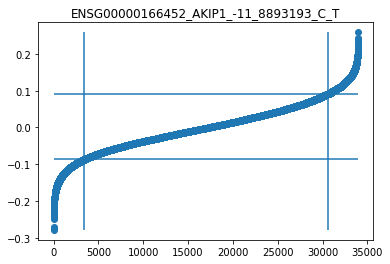

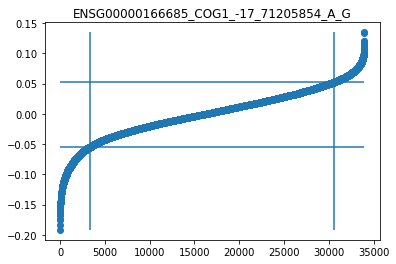

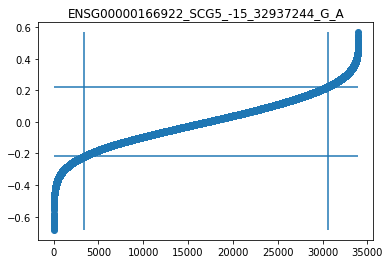

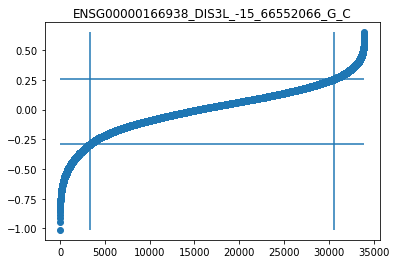

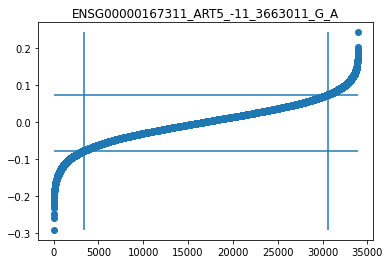

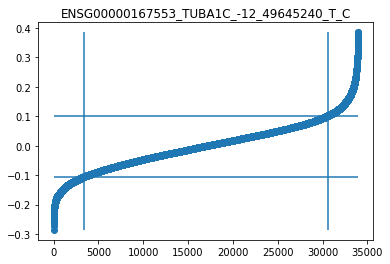

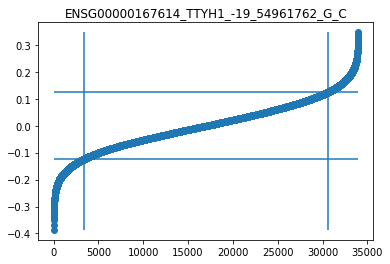

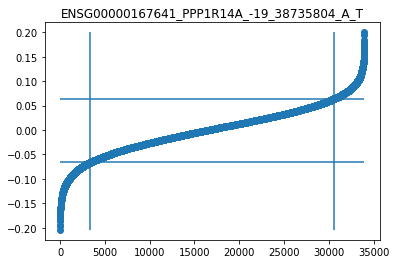

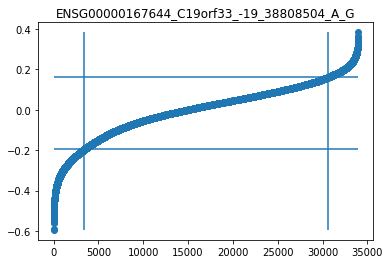

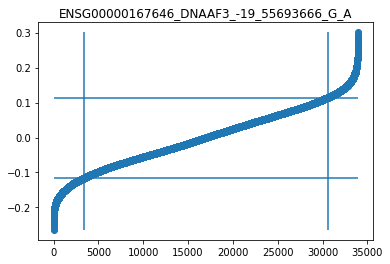

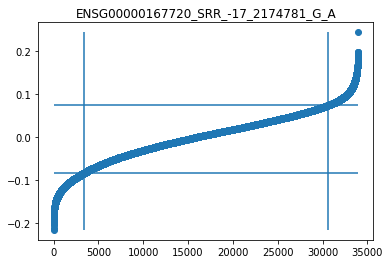

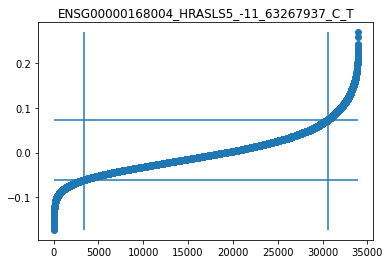

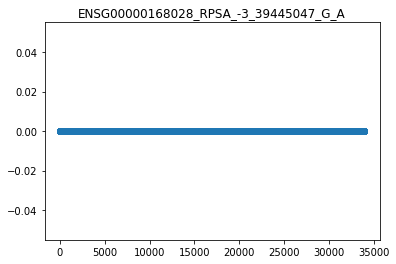

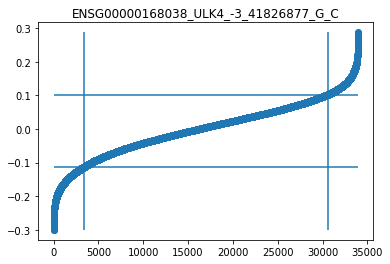

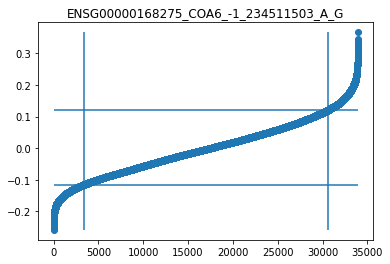

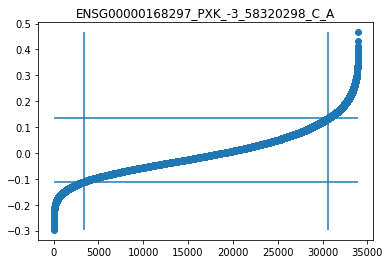

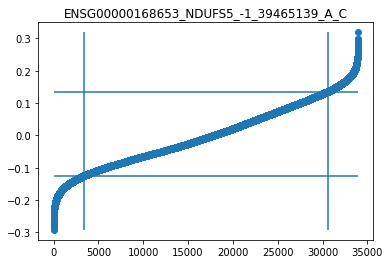

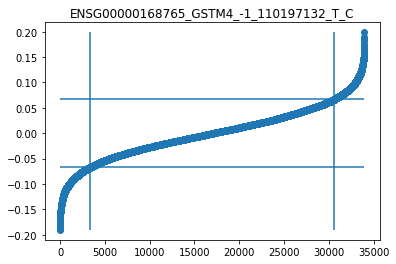

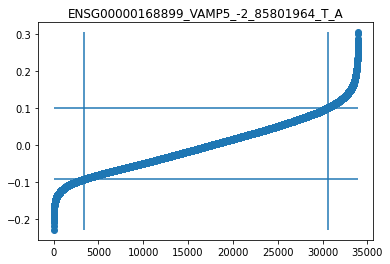

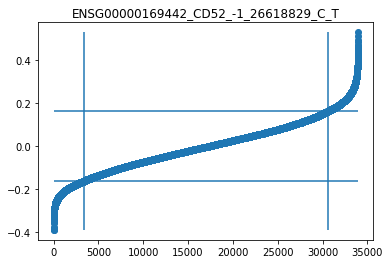

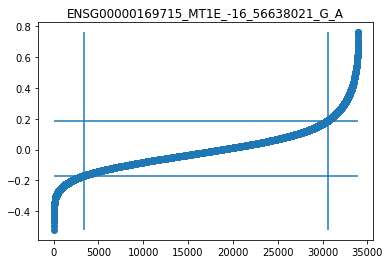

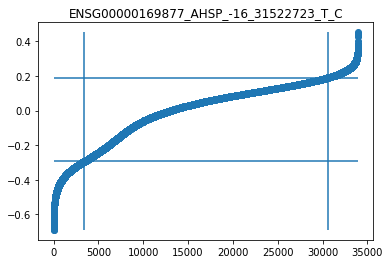

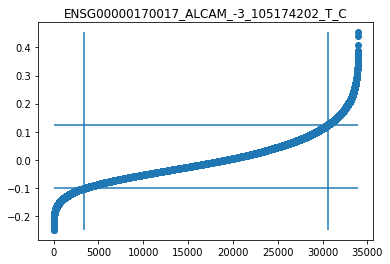

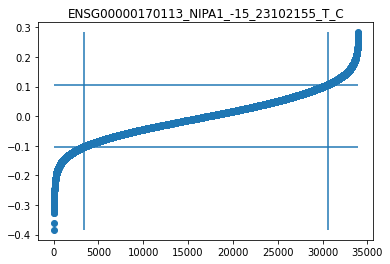

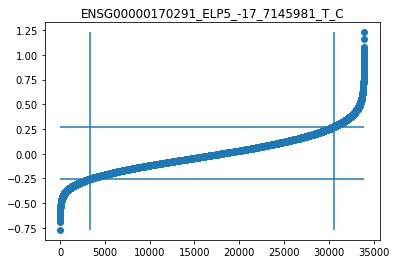

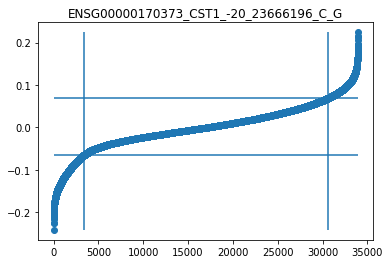

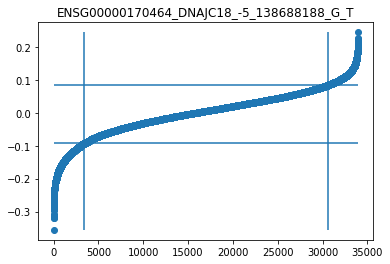

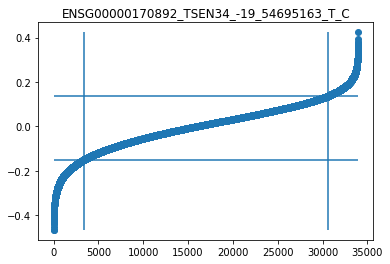

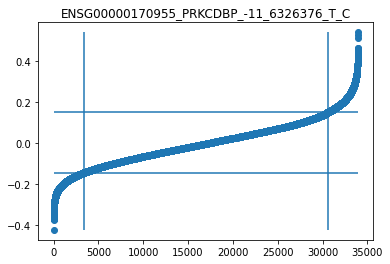

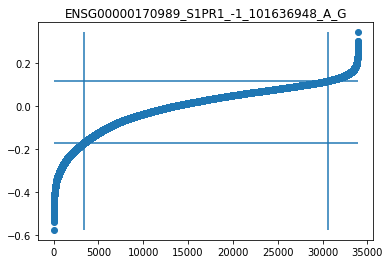

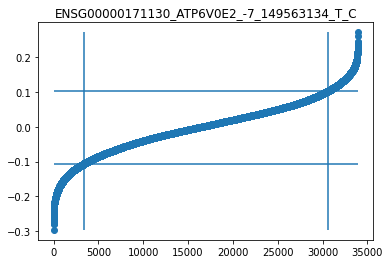

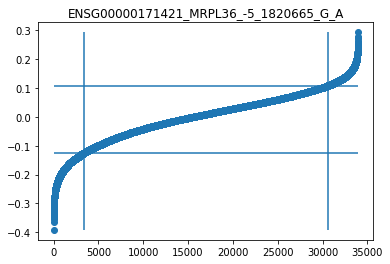

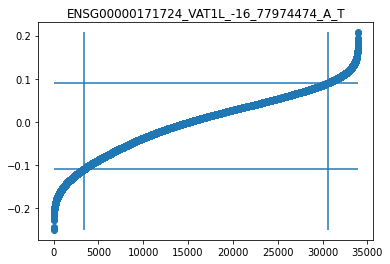

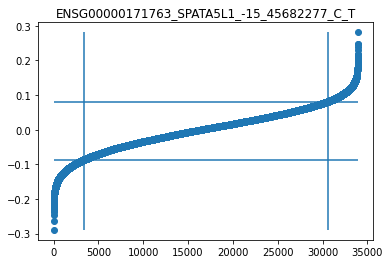

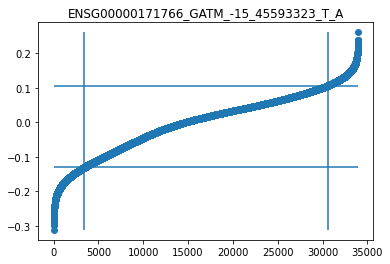

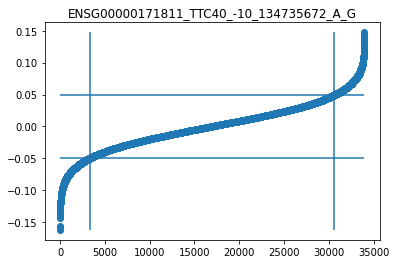

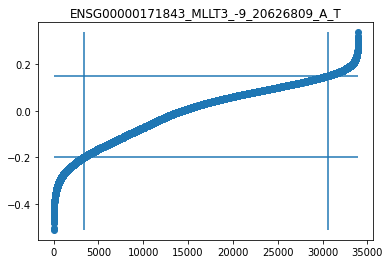

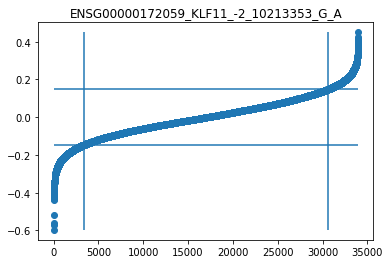

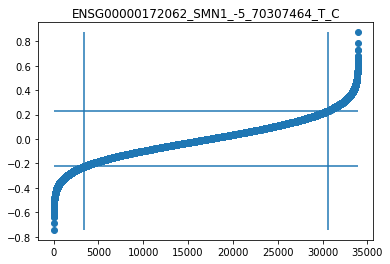

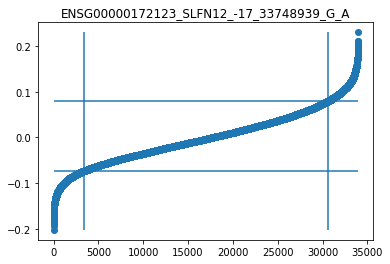

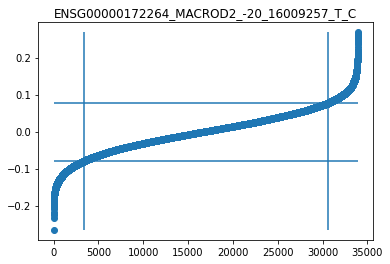

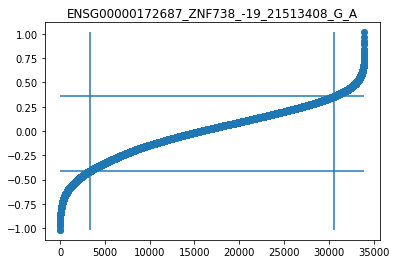

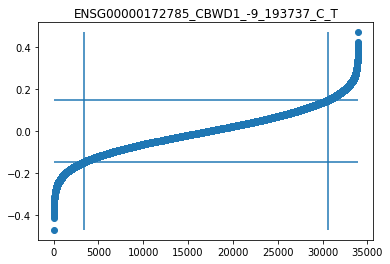

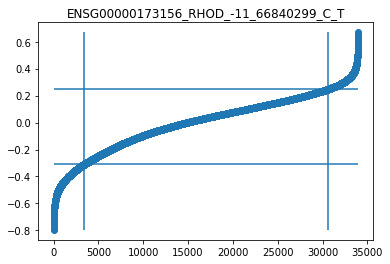

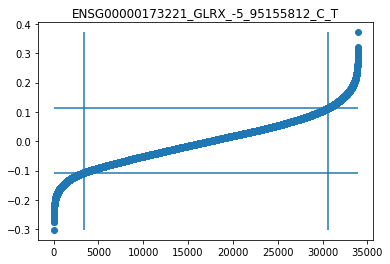

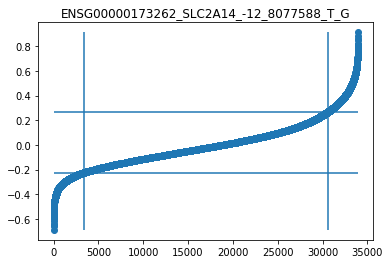

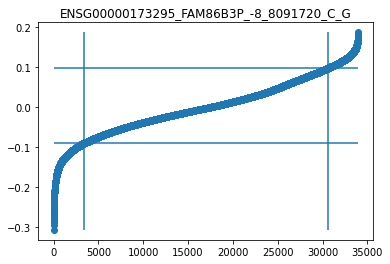

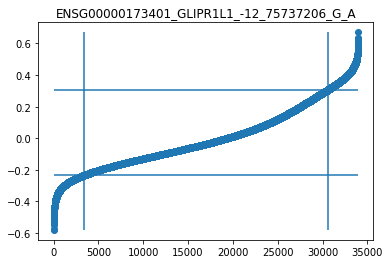

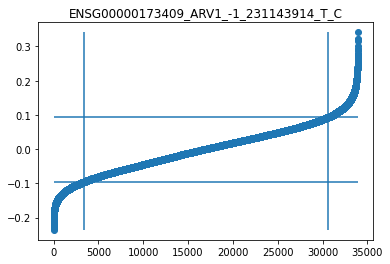

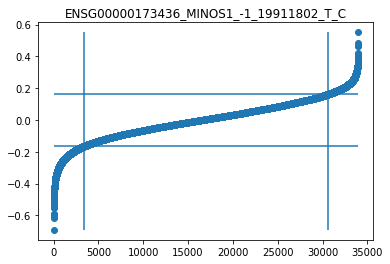

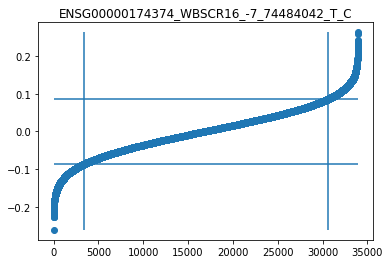

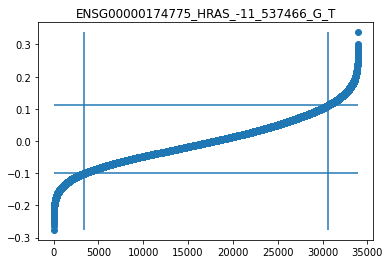

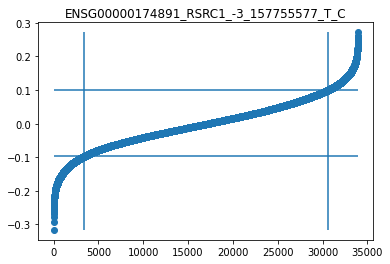

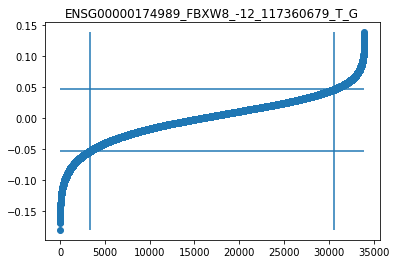

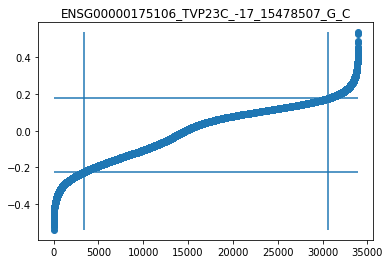

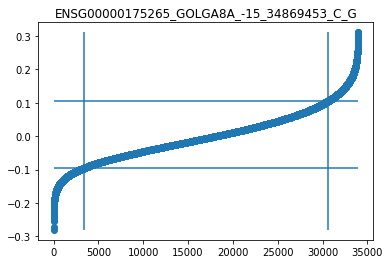

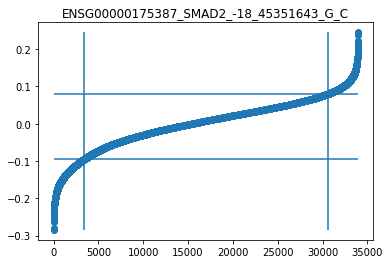

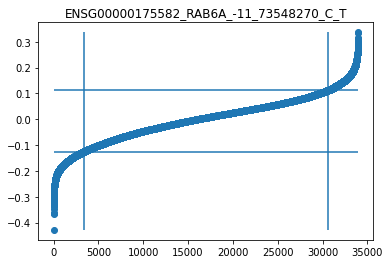

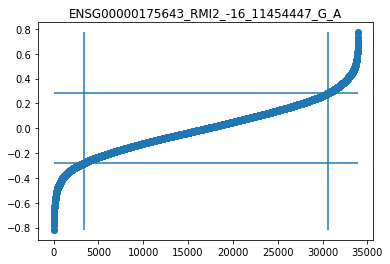

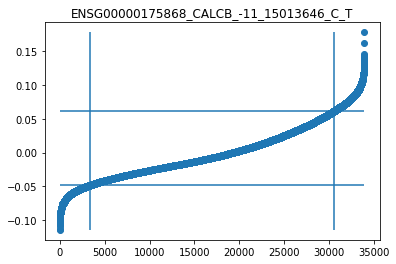

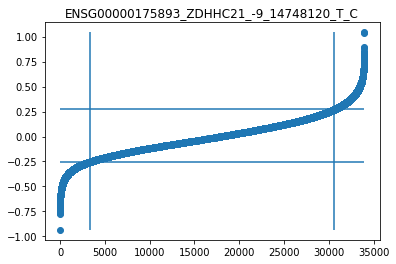

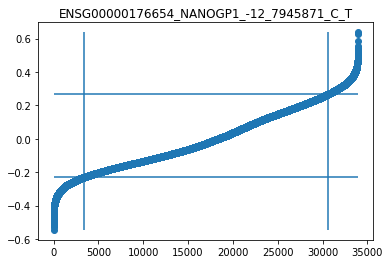

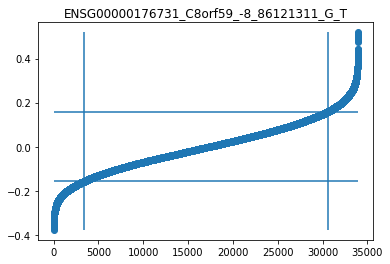

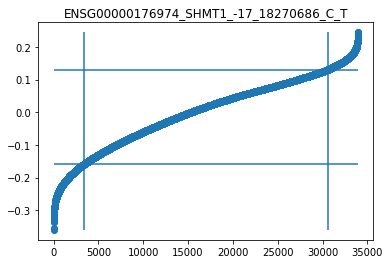

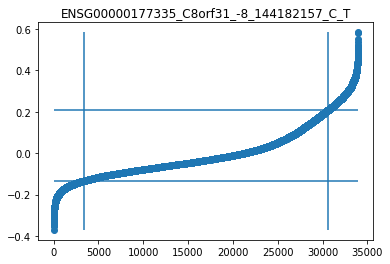

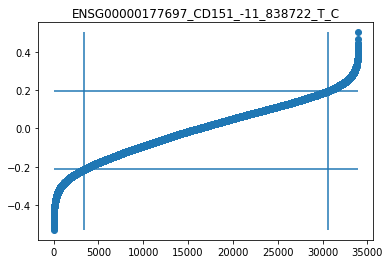

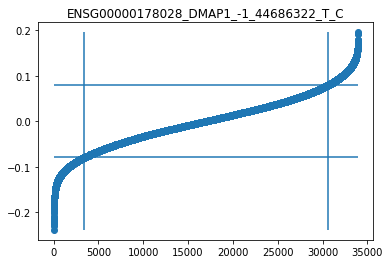

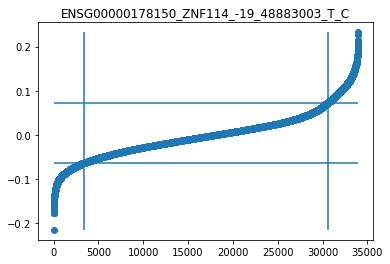

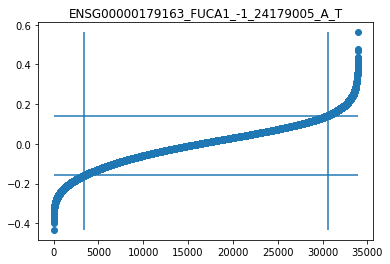

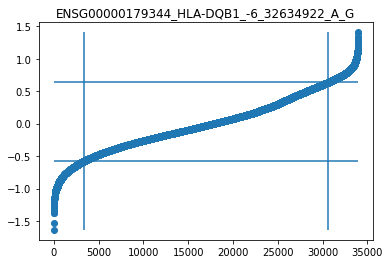

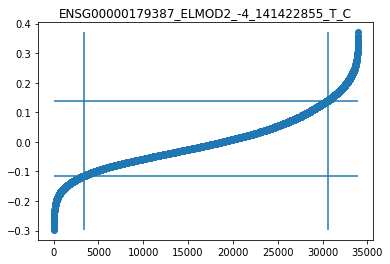

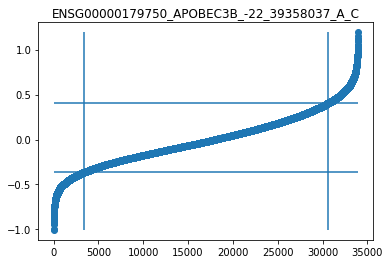

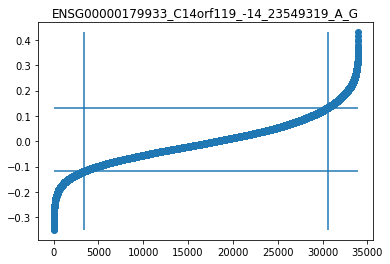

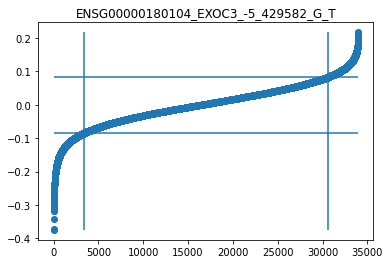

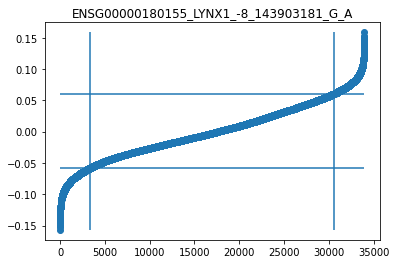

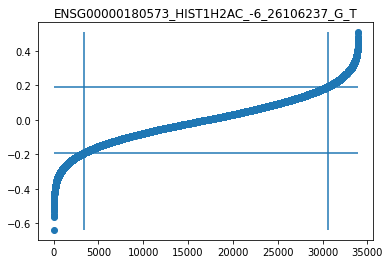

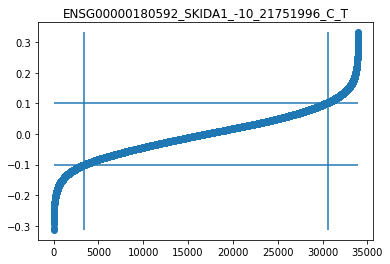

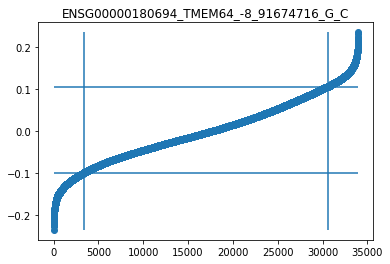

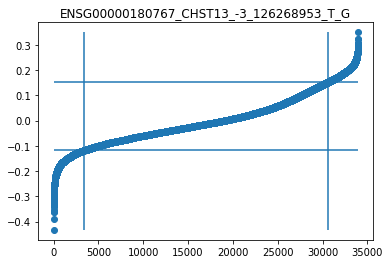

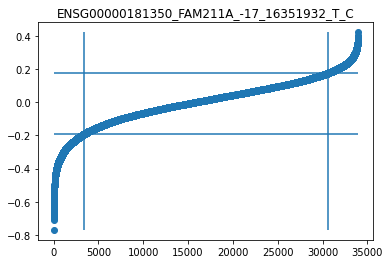

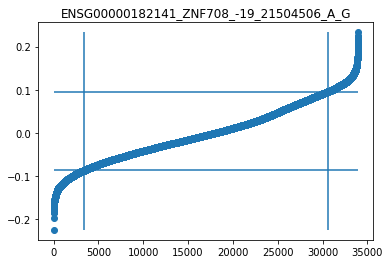

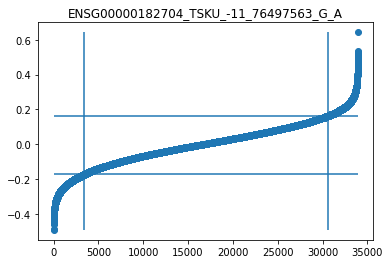

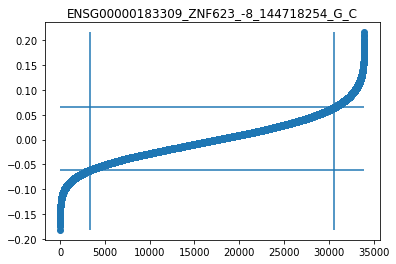

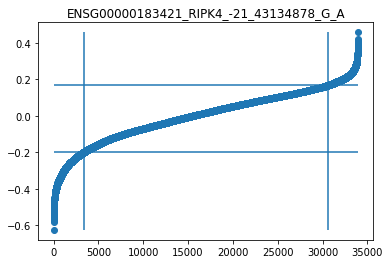

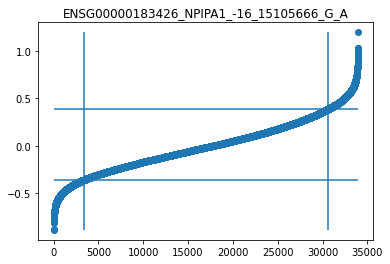

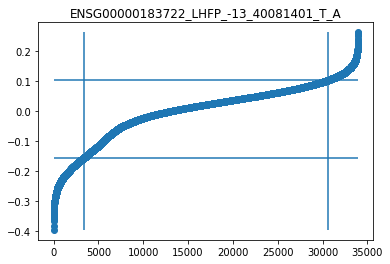

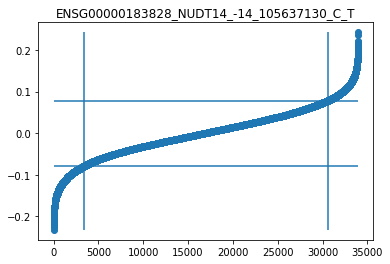

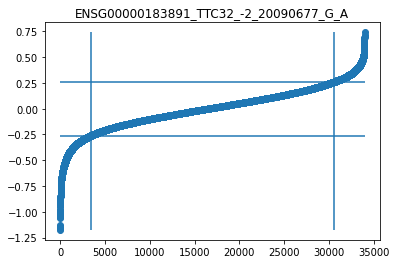

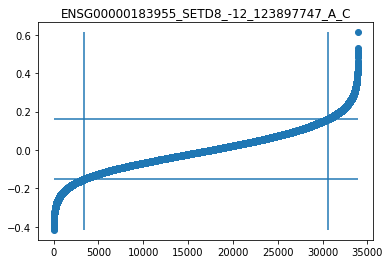

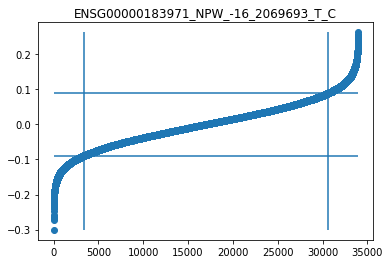

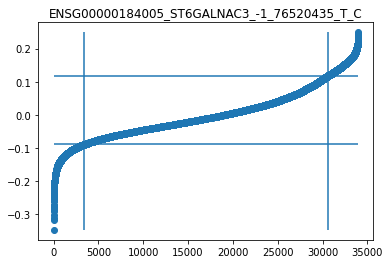

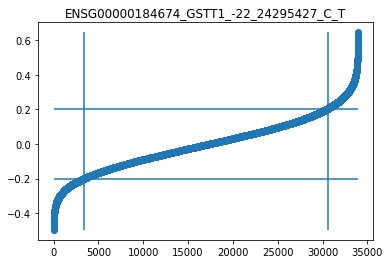

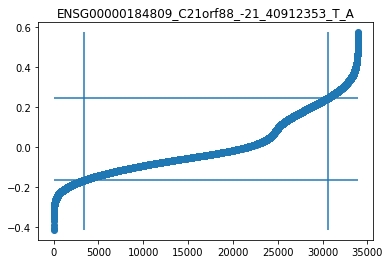

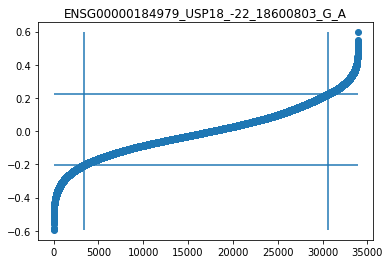

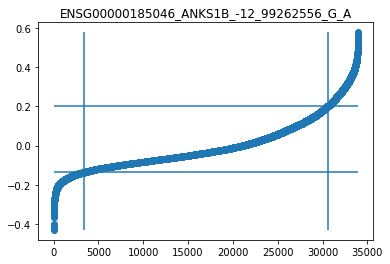

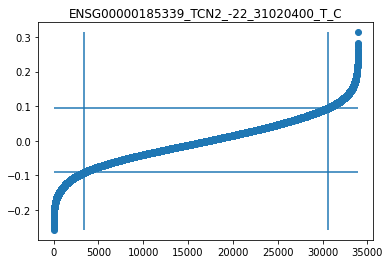

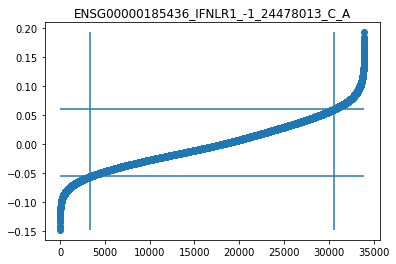

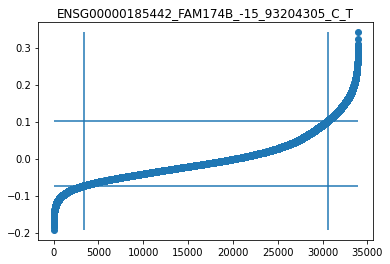

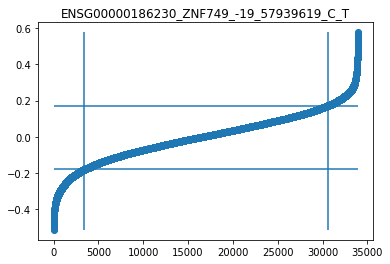

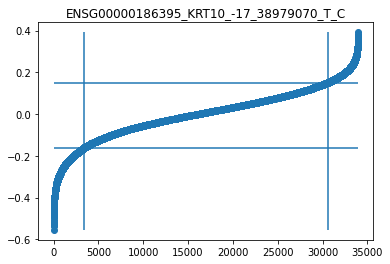

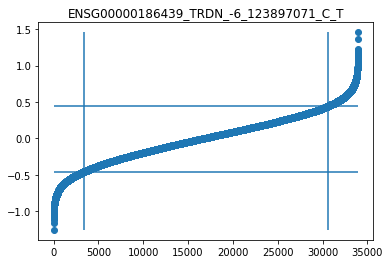

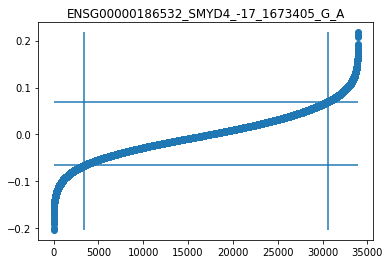

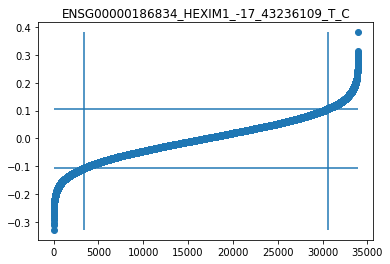

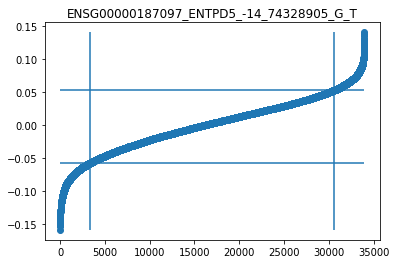

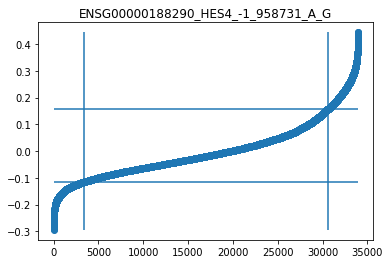

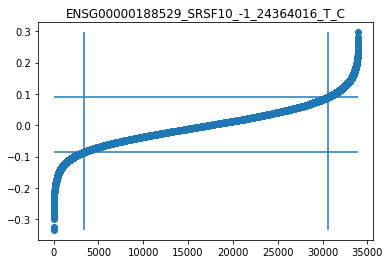

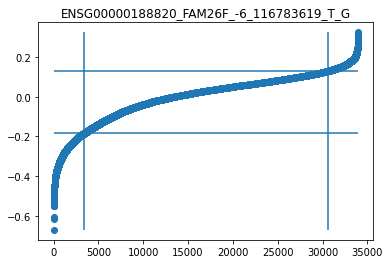

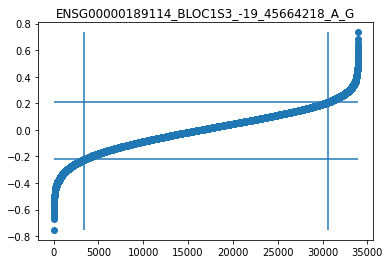

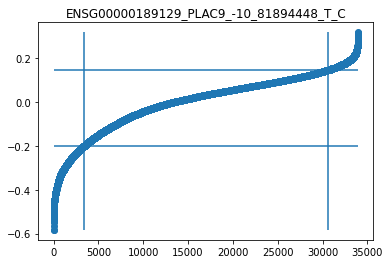

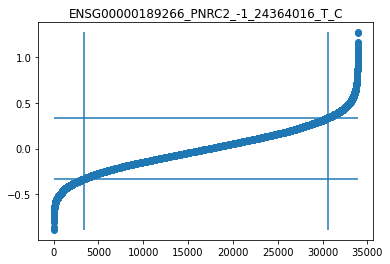

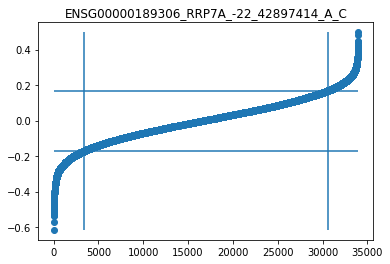

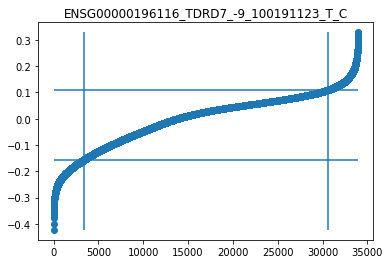

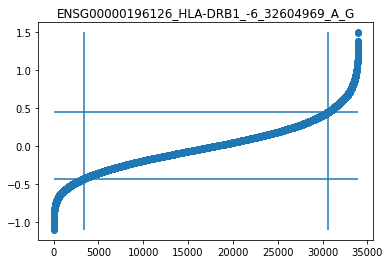

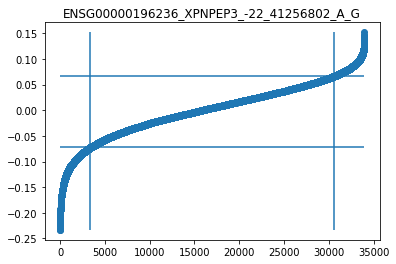

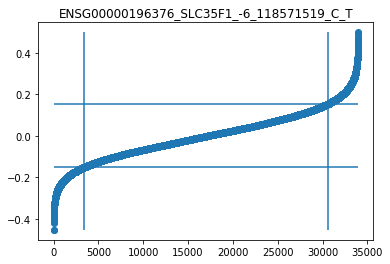

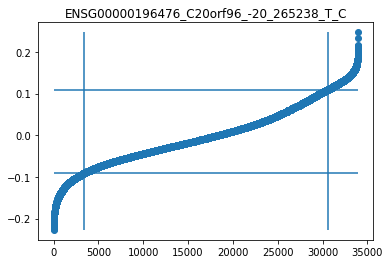

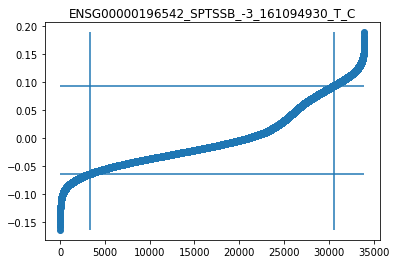

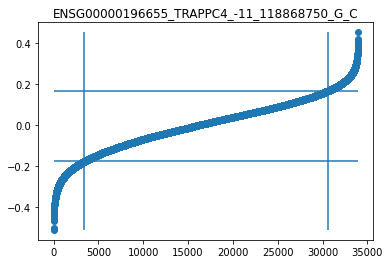

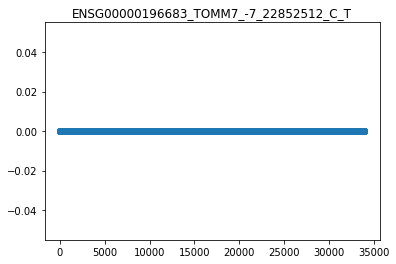

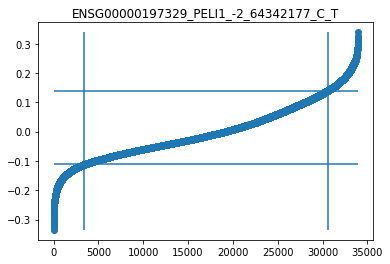

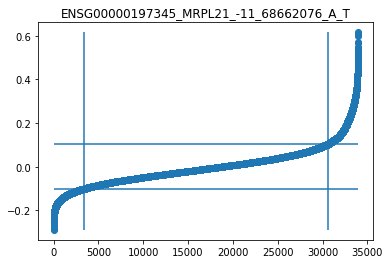

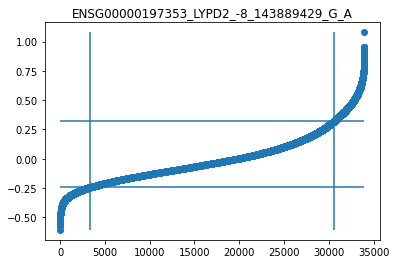

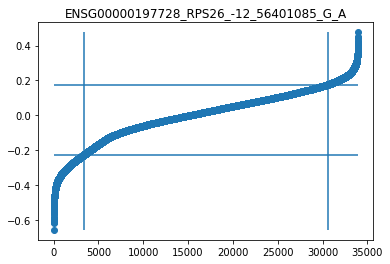

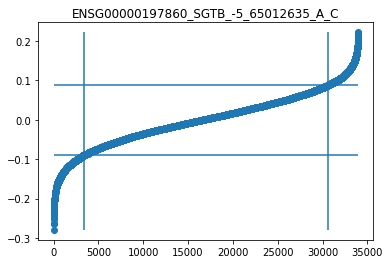

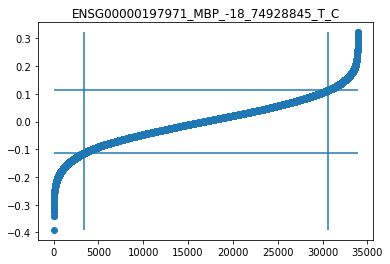

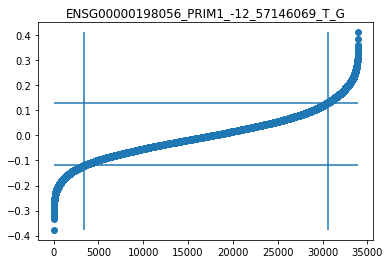

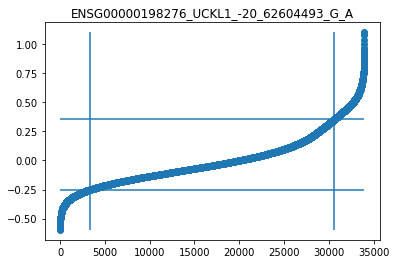

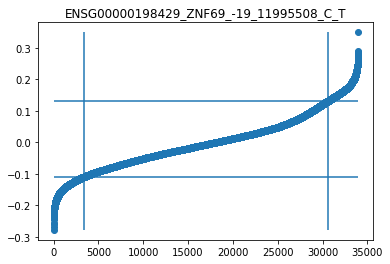

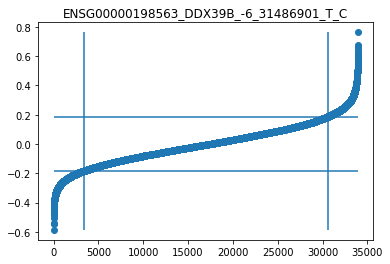

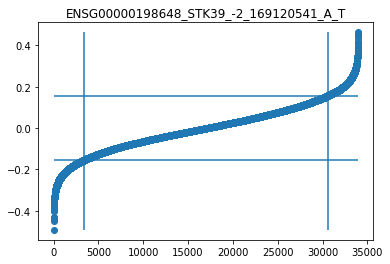

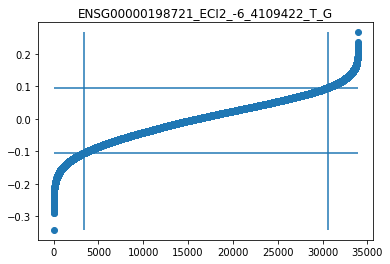

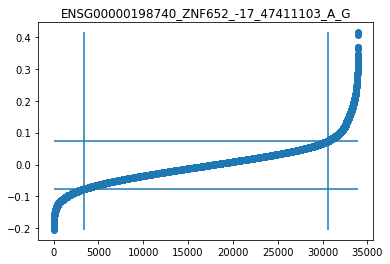

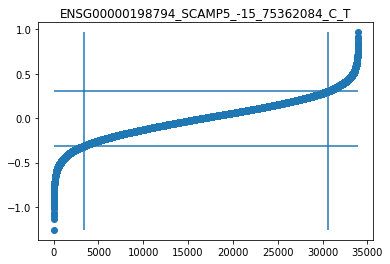

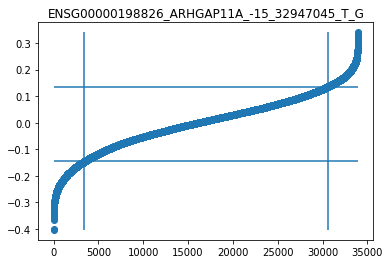

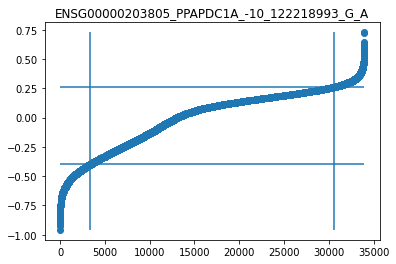

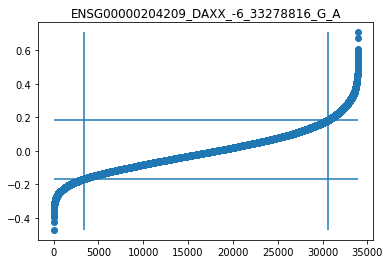

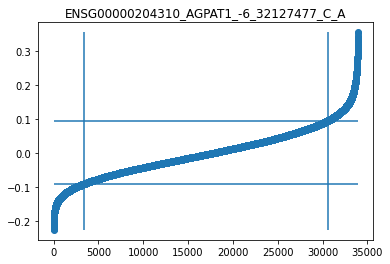

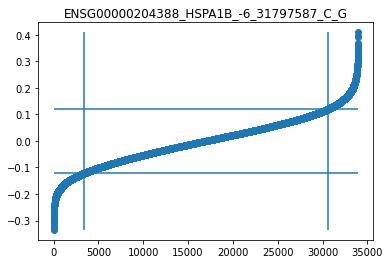

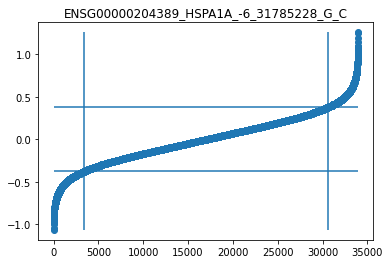

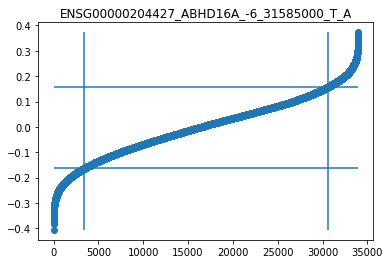

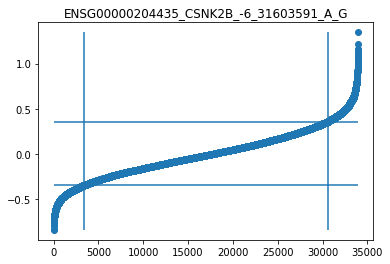

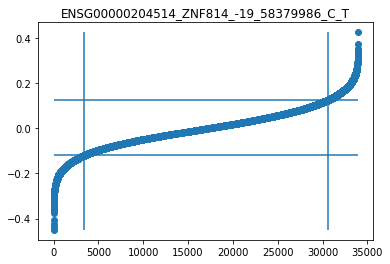

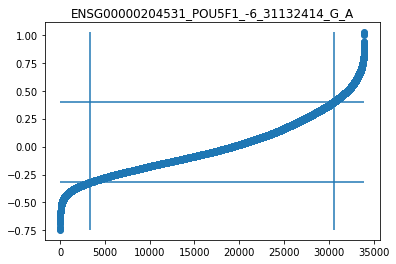

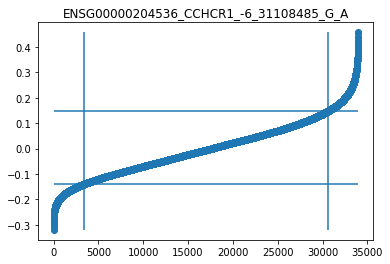

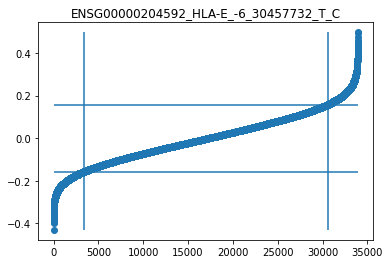

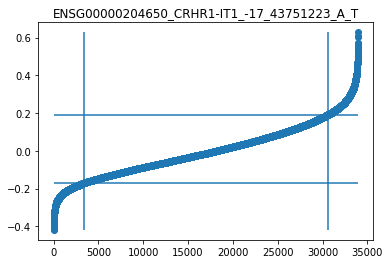

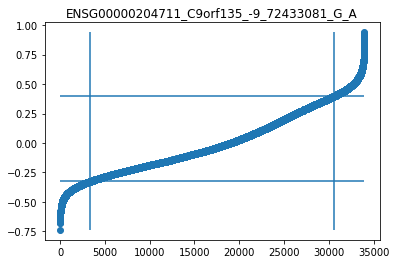

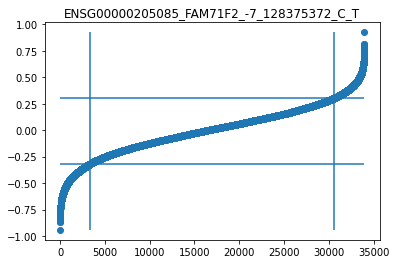

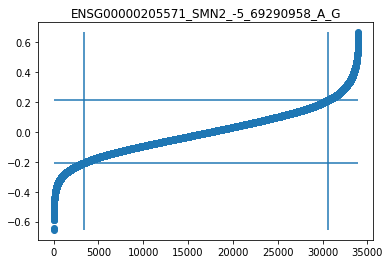

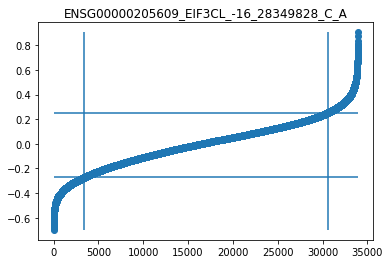

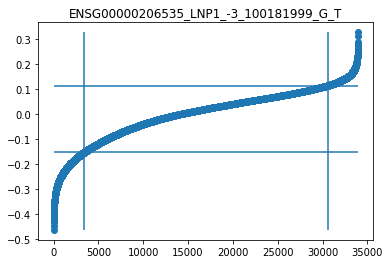

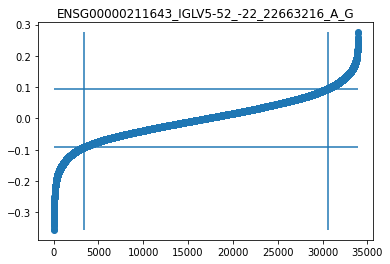

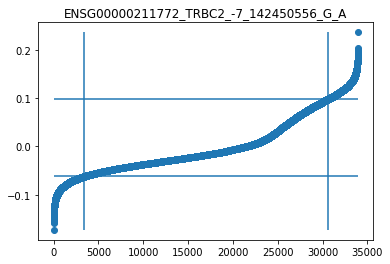

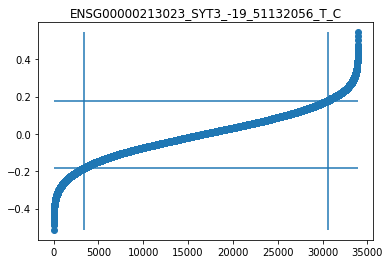

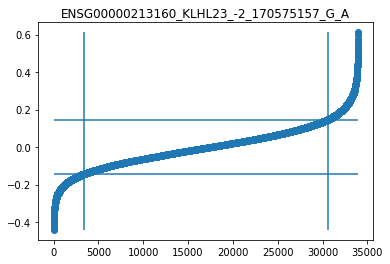

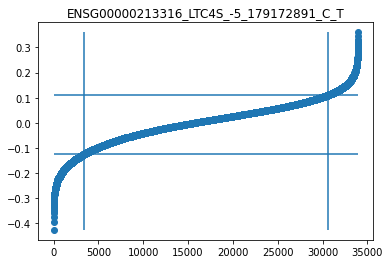

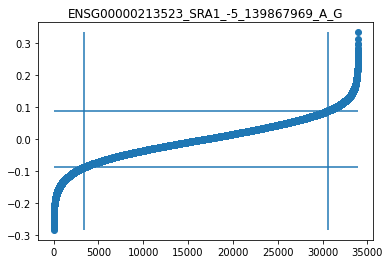

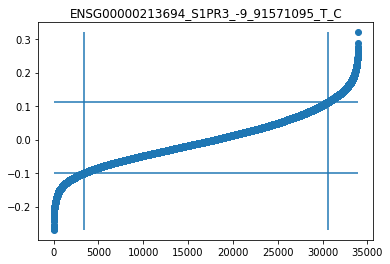

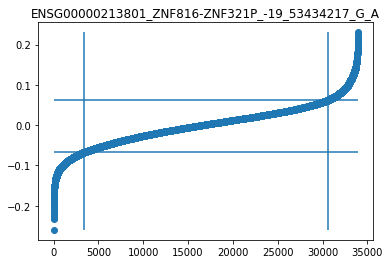

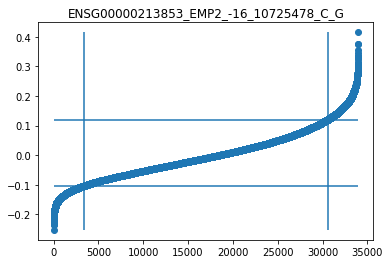

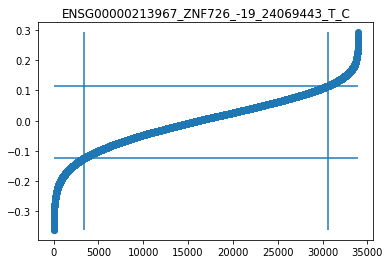

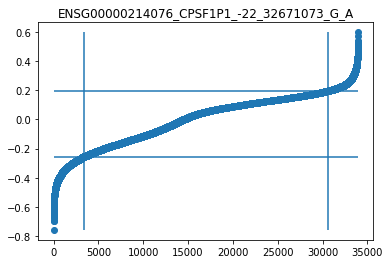

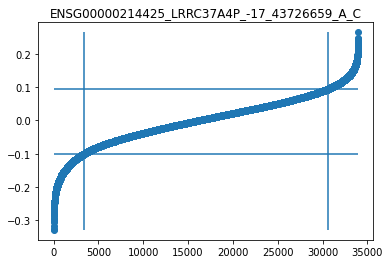

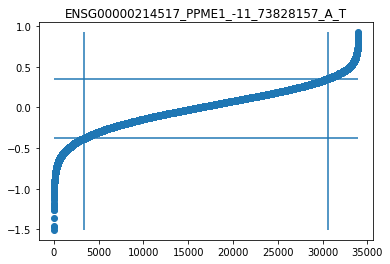

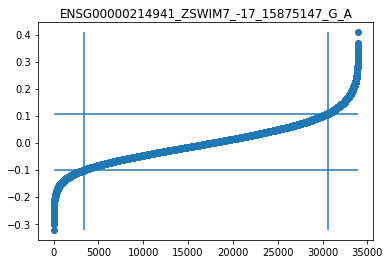

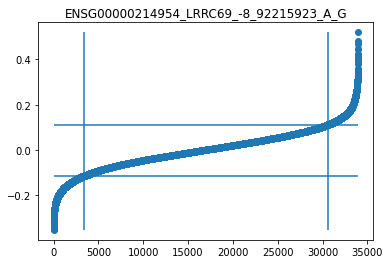

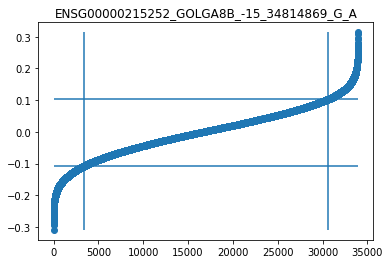

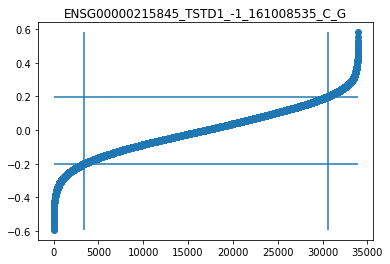

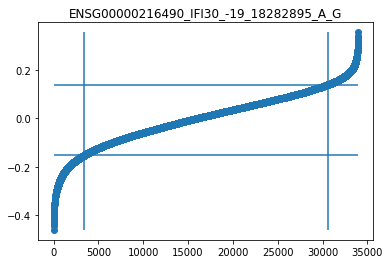

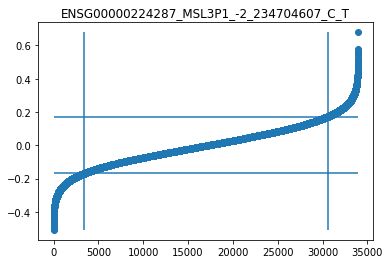

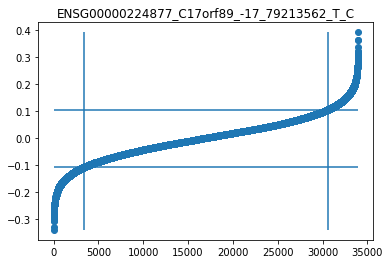

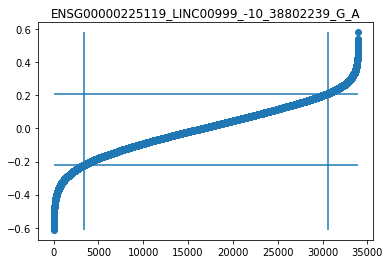

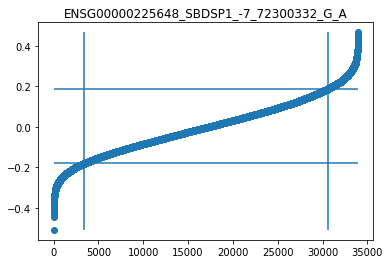

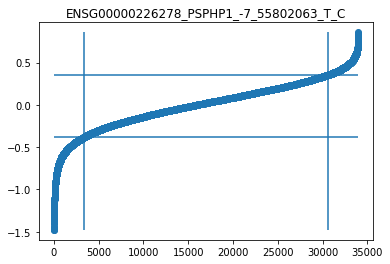

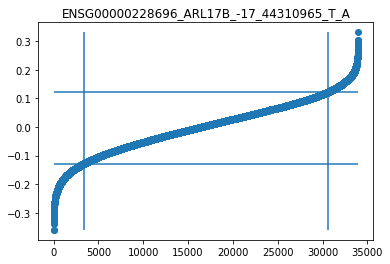

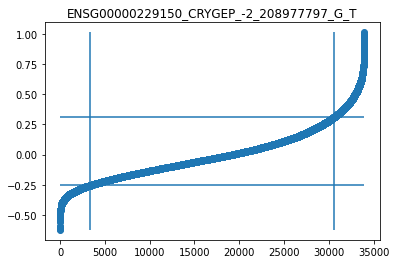

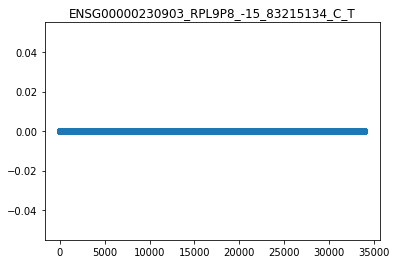

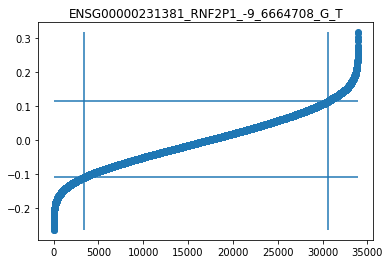

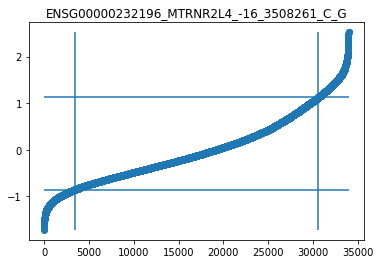

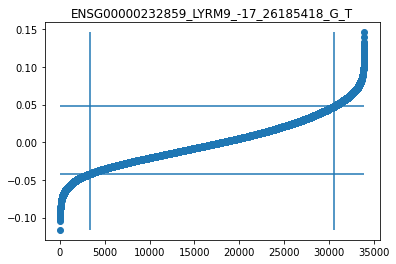

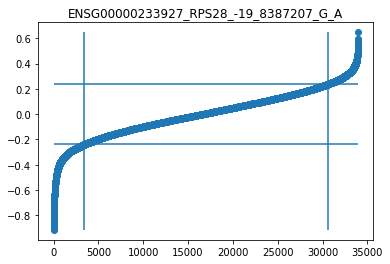

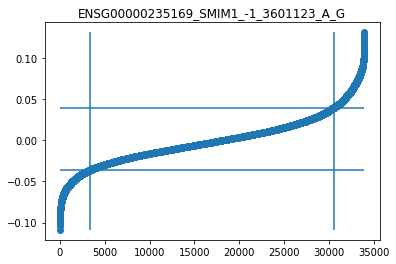

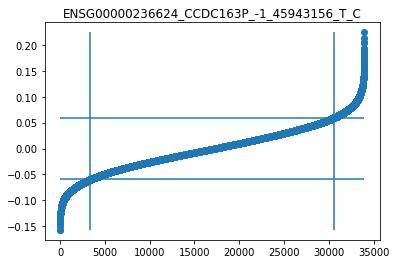

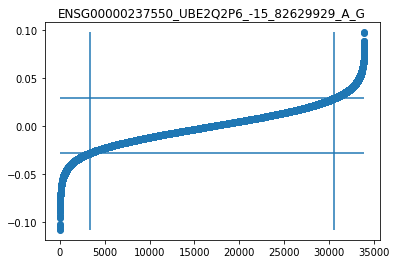

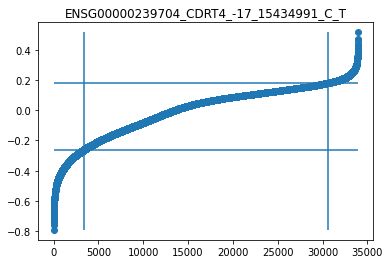

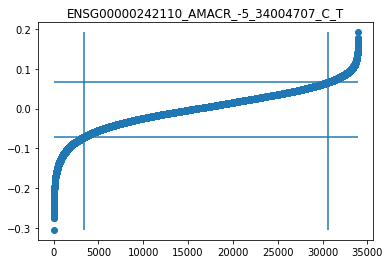

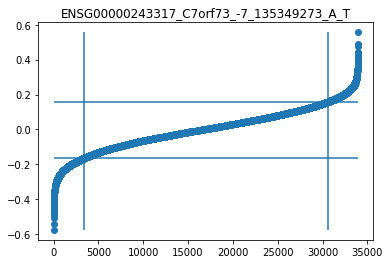

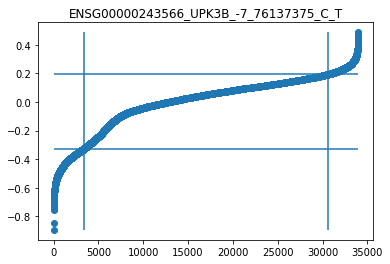

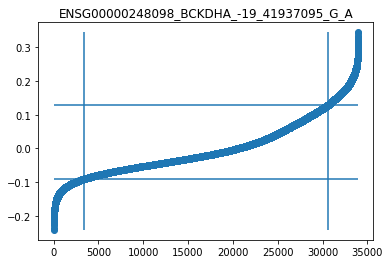

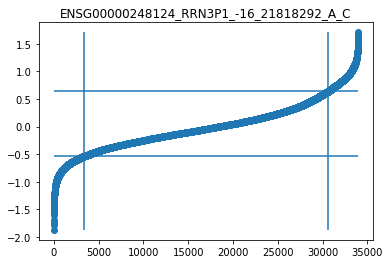

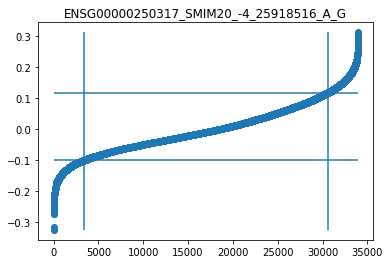

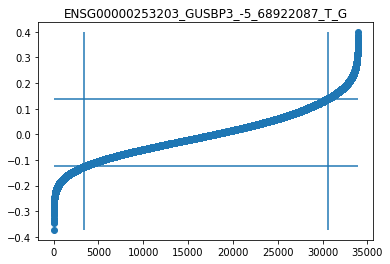

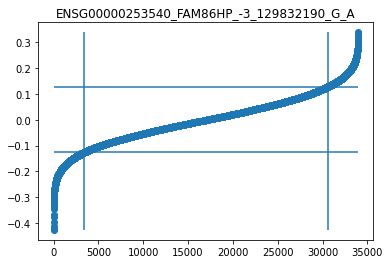

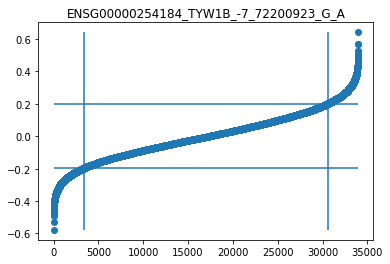

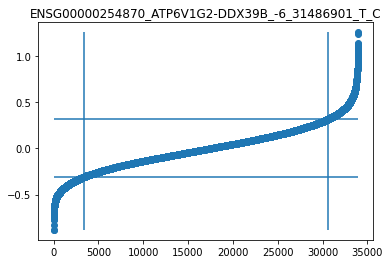

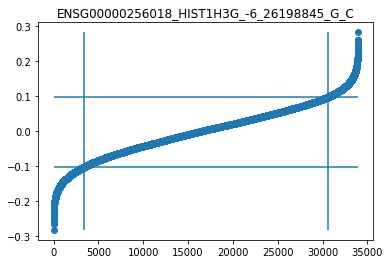

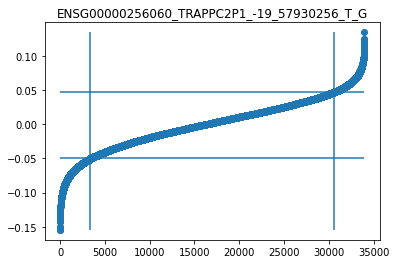

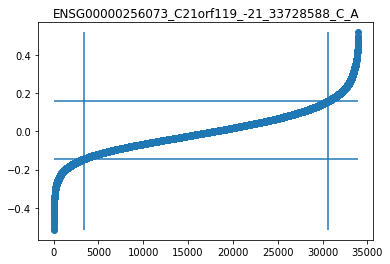

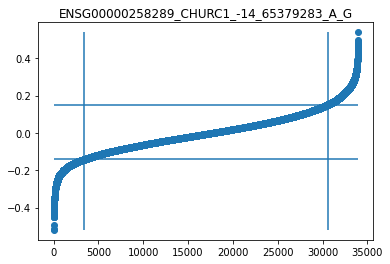

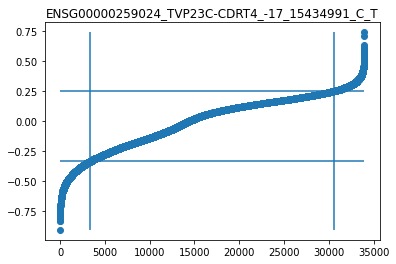

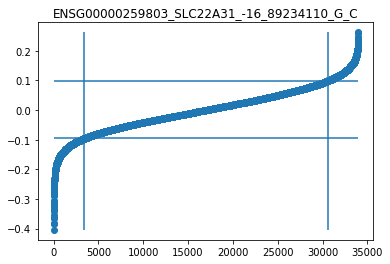

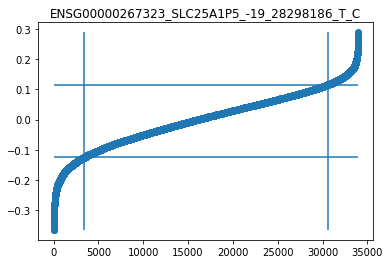

In [3]:
beta = np.array([])
for i in range(df.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = df.values[:,i]
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
    plt.title(df.columns.values[i])
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

In [4]:
beta.shape
df.columns.values.shape

(525,)

In [5]:
d = np.concatenate([beta.reshape(beta.shape[0],1),df.columns.values.reshape(beta.shape[0],1)], axis=1)
df_beta = pd.DataFrame(data = d, columns = ["beta","eqtl"])
df_beta.head()

beta                                       eqtl
0  0.158762  ENSG00000005059_CCDC109B_-4_110648632_T_A
1  0.197055     ENSG00000006016_CRLF1_-19_18669987_G_A
2  0.136799     ENSG00000006459_KDM7A_-7_139913409_G_A
3  0.255908     ENSG00000008018_PSMB1_-6_170790672_A_G
4  0.209056     ENSG00000008324_SS18L2_-3_42588598_G_C

In [6]:
# df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA1/eqtl_est_single_GxE_genetic_effects.csv")
# df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA2/eqtl_est_single_GxE_genetic_effects.csv")
# df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA5/eqtl_est_single_GxE_genetic_effects.csv")
df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA20/eqtl_est_single_GxE_genetic_effects.csv")

In [7]:
max(beta)

3.6733681959327296

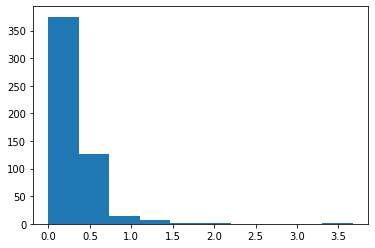

In [8]:
plt.hist(beta)
plt.show()

In [9]:
beta[beta.argsort()]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05678397, 0.07159722, 0.07534114, 0.08429457, 0.08918027,
       0.09563544, 0.09709123, 0.09736351, 0.09828141, 0.09876063,
       0.10574717, 0.10669745, 0.10948284, 0.10974127, 0.11099221,
       0.11550418, 0.11817735, 0.11891449, 0.11933914, 0.12116308,
       0.12468283, 0.1248991 , 0.12583709, 0.12687411, 0.12780343,
       0.12810536, 0.1292376 , 0.12952777, 0.13003509, 0.13212318,
       0.13323327, 0.13342186, 0.1337625 , 0.1344464 , 0.13563473,
       0.13605737, 0.13656284, 0.13679917, 0.137008  , 0.13718799,
       0.13893241, 0.13948185, 0.14307464, 0.14332288, 0.14361512,
       0.14373776, 0.14413366, 0.14420604, 0.14502338, 0.14577696,
       0.1497693 , 0.15001006, 0.15083143, 0.15151627, 0.15183927,
       0.15203224, 0.15323385, 0.15492915, 0.15576925, 0.1564068 ,
       0.15690039, 0.15702784, 0.15710162, 0.15722276, 0.15778085,
       0.15876168, 0.15904095, 0.1593327 , 0.15949208, 0.16114

In [10]:
df_betas_sel = df_beta[df_beta["beta"]>1]
df_betas_sel

beta                                       eqtl
55   1.658536  ENSG00000100058_CRYBB2P1_-22_25845855_C_G
147  1.255811   ENSG00000124693_HIST1H3B_-6_26020936_C_T
151  1.146719      ENSG00000125144_MT1G_-16_56638021_G_A
154  1.257389       ENSG00000125885_MCM8_-20_5912125_C_T
202  3.673368       ENSG00000137331_IER3_-6_30639412_A_G
309  1.236491     ENSG00000164344_KLKB1_-4_187174030_G_T
392  1.208602   ENSG00000179344_HLA-DQB1_-6_32634922_A_G
501  1.981719   ENSG00000232196_MTRNR2L4_-16_3508261_C_G
512   1.17282    ENSG00000248124_RRN3P1_-16_21818292_A_C